# DSBA 6156 Midterm Study Guide Outline

I put this together as an example of how I have organized/am organizing my notes for the exam.  If all I cared about was ***this*** exam, I might not be so fastidious about the organization and structure.  I do think that this is a reasonable structure when considering the long view of wanting to review this information later on.

Collapsing the <font color="#162">**green**</font> headings will hide the extra supporting material.  Collapsing them all will provide a compact summary of what is in the midterm.

**Note**: <font color="#099">Naive Bayes is mentioned throughout the material, but that is probability based learning which will not be covered in the midterm<font>

## <font color="#162">Code to load in additional content</font>

This section sets up some useful code.

The code here is used to read in output pulled from ChatGPT which is in a markdown like format.  The only problem is that the math equations do not display properly. This has a routine that will load in the output and tweak it to make it displayable. There is an example of using this at the end of this notebook.

You may also want to import other modules that will allow you to show code examples that might be helpful

**Note**: *There are a couple of instances where this does not process the equations properly in lists. It is on my to do list to fix this.*

### Get Up to Date Packages

In [ ]:
!pip install --upgrade pdf2image
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


### Imports

In [ ]:
# Core Python Libraries
import json
import os
import sys
import re
from datetime import date
from pdf2image import convert_from_path

# Data Science Specific Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Google Collab Goodies
from IPython.display import display_markdown,IFrame
from IPython.display import display_pdf
from IPython.display import display_png
from google.colab import data_table
data_table.enable_dataframe_formatter()
from google.colab import drive

### Constants



In [ ]:
DSBA_6156_MIDTERM_CONTENT_PATH = '/content/drive/My Drive/DSBA-6156-MidTerm/'

### Mount your drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load PDFs as Image Arrays

In [ ]:
slides3A = convert_from_path(f'{DSBA_6156_MIDTERM_CONTENT_PATH}slides/BookSlides_3A_Data_Exploration.pdf')
slides4B = convert_from_path(f'{DSBA_6156_MIDTERM_CONTENT_PATH}slides/BookSlides_4B_Information_Based_Learning.pdf')
slides4A = convert_from_path(f'{DSBA_6156_MIDTERM_CONTENT_PATH}slides/BookSlides_4A_Information-based_Learning.pdf')

### Some utility code

The code below can be used to transform chatgpt markdown so that the math equations look right in google colab.  To use this you can save the GPT output (when copied using the copy icon) to your google drive and loading the contents from the file.

**Note**: *I am not sure if there is a way to use the shared URL to pull in the markdown*


In [ ]:
def md_cnvrt(text):
    # Define the patterns to match
    #
    #
    # TODO: Fix this by making sure that when we add a new line triggered by "\[ that we prepend the indentation
    #
    #
    # caution, the order of the patterns matters
    #note: \[ --> [
    # \\ --> \
    patterns = {
        r'\n\s+\\\[': r'\n$$\n',  # match \[ followed by any number of spaces at the beginning of a line
        r'\n\s+\\\]': r'\n$$\n',  # match \] preceded by any number of spaces at the end of a line
        r"\\\[\s": r"$", # match \[ followed by a space
        r"\\\(\s": r"$", # match \( followed by a space
        r"\s\\\]": r"\n$$\n", # match \] preceded by a space
        r"\s\\\)": r"$", # match \) preceded by a space
        r"\\\[\n": r"\n$$\n", # match \[ followed by a newline
        r"\n\\\]": r"\n$$\n", # match \] preceded by a newline
        r"\\\(" : r"$", # match \(
        r"\\\)" : r"$", # match \)
        r"\\\]\n" : r"\n$$\n", # handling some cases of \] followed by a newline cannot be detected
        r"\\\]": r"\n$$\n", # matching some missing closing brackets
    }
    # prevent '\r' from being replaced

    # Iterate over patterns and replace them in the text
    for pattern, replacement in patterns.items():
        text = re.sub(pattern, replacement, text)
    return text
def show_gpt_content(filename,color=None):
  prefix=""
  postfix=""
  if color:
    prefix=f'<div style="color: {color};">'
    postfix='</div>'
  display_markdown(prefix + md_cnvrt(open(f'{DSBA_6156_MIDTERM_CONTENT_PATH}{filename}').read()) + postfix,raw=True)

## Data Quality and Exploration

### <font color="#162">In Theory</font>

#### Why is ML an ill posed problem?

Machine Learning is considered to be an <font color="#099">***ill posed***</font> problem because it does not satisfy all of the conditions needed to be a <font color="#099">***well posed***</font> problem defined as..

* The problem has a solution – <font color="#900">*often we have machine learning problems that do not have a solution*</font>.
* The solution is unique – <font color="#900">*In the cases where a solution exists there is often more than one solution*</font>.
* The solution's behavior changes continuously with the initial conditions – <font color="#900">*There are instances when even small changes in initial conditions can cause large changes in the output*.</font>

<font color="#099">It is very difficult to come up with a single robust model (aka infer an algorithm) by looking at sample collection of descriptive an target features.</font>

#### What is meant by no free lunch theorem

**Paraphrased**: <font color="#099">*You need to understand your problem and the available models and make informed decisions on which model is best suited to solve the problem*.</font>

Detailed description below:


#### TANSTAAFL

<font color="#099">***There Ain't No Such Thing As A Free Lunch***</font>

In [ ]:
show_gpt_content("FreeLunch.gpt.md")

The "No Free Lunch" (NFL) theorem in data science is a concept that underscores the idea that there is no one-size-fits-all algorithm or method that works best for every problem. Coined by David Wolpert and William Macready in 1997, the theorem essentially states that when averaged over all possible problems, no algorithm is universally better than any other.

Here's a simpler explanation:

Imagine you have a toolbox full of different tools (algorithms), and you want to solve various types of problems (data analysis tasks). The "No Free Lunch" theorem says that no single tool in your toolbox will be the best for every job. Some tools might work better for certain problems, while others might be better for different problems.

In other words:

- There's no algorithm that's universally the best.
- The effectiveness of an algorithm depends on the specific problem you're trying to solve.
- You need to choose the right algorithm for each specific problem based on its characteristics and requirements.

This theorem emphasizes the importance of understanding your data, problem domain, and the strengths and weaknesses of different algorithms when approaching data science tasks. It encourages practitioners to be thoughtful and strategic in selecting and designing algorithms tailored to the specific needs of each problem.

### <font color="#162">The Biases and Variances</font>

* **Inducive Bias**: <font color="#900">*Refers to the inherent assumptions or prior knowledge built into a learning algorithm.*</font>
* **Restriction Bias**: <font color="#900">*Is about the limitations or constraints imposed on the model space or hypothesis space during learning.*</font>
* **Sampling Bias**: <font color="#900">*Occurs when the data used for analysis is not representative of the population it's supposed to represent.*</font>
* **Preference Bias**: <font color="#900">*Refers to the tendency of learning algorithms to prefer certain types of hypotheses or models over others based on subjective preferences or priorities.*</font>
* **Bias Variance Tradeoff**:
  * **Bias**: <font color="#900">*This bias refers to the error introduced by approximating a real-world problem with a simplified model.*</font>
  * **Variance**: <font color="#900">*Variance refers to the model's sensitivity to fluctuations in the training data.*</font>
  * **Tradeoff**: <font color="#900">*Finding the right balance between bias and variance to achieve optimal predictive performance.*</font>

#### Summary of Bias Info

In [ ]:
show_gpt_content("Biases.gpt.md")

Let's break down the differences between inductive bias, restriction bias, sampling bias, and preference bias in data science, and how they relate to the concept of bias-variance tradeoff:

1. **Inductive Bias, Restriction Bias, Sampling Bias, and Preference Bias**:

   - **Inductive Bias**: Refers to the inherent assumptions or prior knowledge built into a learning algorithm. It guides the learning process by favoring certain hypotheses or models over others based on these assumptions. Inductive bias affects how well the model generalizes to unseen data.
   
   - **Restriction Bias**: Is about the limitations or constraints imposed on the model space or hypothesis space during learning. It's influenced by the choice of model class or family of functions that the algorithm considers. Too much restriction may lead to underfitting, while too little may lead to overfitting.
   
   - **Sampling Bias**: Occurs when the data used for analysis is not representative of the population it's supposed to represent. It arises from systematic errors in the data collection process, leading to skewed or non-random samples. This can lead to incorrect conclusions because the analysis is based on a biased sample.
   
   - **Preference Bias**: Refers to the tendency of learning algorithms to prefer certain types of hypotheses or models over others based on subjective preferences or priorities. It influences the choice of model selection criteria, regularization techniques, or optimization algorithms used during training.

2. **Bias-Variance Tradeoff**:

   - **Bias**: In the context of the bias-variance tradeoff, bias refers to the error introduced by approximating a real-world problem with a simplified model. High bias means the model is too simplistic and fails to capture the underlying patterns in the data.
   
   - **Variance**: Variance refers to the model's sensitivity to fluctuations in the training data. High variance means the model is overly complex and captures noise in the training data rather than the underlying patterns, leading to poor generalization to unseen data.
   
   - **Tradeoff**: The bias-variance tradeoff is about finding the right balance between bias and variance to achieve optimal predictive performance. Increasing model complexity reduces bias but increases variance, and vice versa. The goal is to minimize the total error, which is the sum of the bias and variance.

In summary, while inductive bias, restriction bias, sampling bias, and preference bias focus on different aspects of bias in data science, the bias-variance tradeoff is a broader concept that deals with the tradeoff between bias and variance in predictive modeling. Addressing biases and understanding the bias-variance tradeoff are both essential for building accurate and robust machine learning models.

#### More on Bias

In [ ]:
show_gpt_content("Biases-detailed.gpt.md")

**Simple explanation of each bias**:

1. **Inductive Bias**: Think of inductive bias as the assumptions or beliefs your learning algorithm starts with. These beliefs guide how the algorithm learns from data. If these assumptions are too rigid or wrong, it can lead to incorrect conclusions.

2. **Restriction Bias**: This bias is like having blinders on. It happens when your model can only consider a limited set of possibilities. If the model's scope is too narrow, it might miss important patterns in the data. But if it's too broad, it might get lost in noise and overfit the data.

3. **Sampling Bias**: Sampling bias is when the group you're studying isn't a fair representation of the whole population. It's like asking only one group of people about their favorite ice cream and then assuming that's everyone's favorite. This can lead to wrong conclusions because the sample doesn't reflect everyone's opinions.

4. **Preference Bias**: This bias is like having a favorite type of answer. Some algorithms prefer simpler explanations or ones that are easier to compute, even if they're not the most accurate. This can affect the kinds of conclusions the algorithm tends to make.

These biases can affect the accuracy and reliability of your data analysis, so it's important to be aware of them and take steps to minimize their impact.

**Detailed Explanation of each Bias**

In data science, particularly in machine learning and statistical modeling, various types of biases can influence the analysis and results. Here's an explanation of the biases you mentioned:

1. **Inductive Bias**:
   - Inductive bias refers to the assumptions or prior knowledge built into a learning algorithm that guides the process of learning from data.
   - It reflects the algorithm's tendency to prefer certain hypotheses or models over others, based on assumptions about the underlying data distribution or the nature of the problem being solved.
   - Inductive bias helps the algorithm generalize from the training data to make predictions on unseen data. However, if the bias is too strong or inappropriate for the problem at hand, it can lead to poor generalization or incorrect conclusions.

2. **Restriction Bias**:
   - Restriction bias refers to the limitations or constraints imposed on the model space or hypothesis space during the learning process.
   - It arises from the choice of model class or family of functions that the algorithm can consider when fitting the data.
   - Restriction bias can affect the model's ability to represent complex relationships in the data. If the model space is too restricted, the algorithm may underfit the data, leading to poor performance. Conversely, if the model space is too large, it may lead to overfitting.

3. **Sampling Bias**:
   - Sampling bias occurs when the data used for analysis is not representative of the population it is supposed to represent.
   - It arises from systematic errors in the process of collecting or selecting the data, leading to skewed or non-random samples.
   - Sampling bias can lead to incorrect conclusions or misleading insights because the analysis is based on a biased sample that does not accurately reflect the true characteristics of the population.

4. **Preference Bias**:
   - Preference bias refers to the tendency of learning algorithms to prefer certain types of hypotheses or models over others, based on criteria such as simplicity, interpretability, or computational efficiency.
   - It reflects the subjective preferences or priorities embedded in the algorithm or the learning process.
   - Preference bias can influence the choice of model selection criteria, regularization techniques, or optimization algorithms used during training, which in turn affects the final model's characteristics and performance.

Addressing these biases requires careful consideration and appropriate techniques, such as cross-validation, regularization, bias correction methods, and ensuring representative sampling, to mitigate their impact and improve the reliability and validity of data science analyses and models.



### <font color="#162">Wrangling the Data for Better Quality</font>

* Raw vs Derived Features -- Dervived features are created by ***transforming, combining ot enriching existing features***
* Imputation
  * **Continuous**:
    * **Mean/Median**: *Replace missing values with the mean or median of the feature.*
    * **Linear Regression**: *Predict missing values using a linear regression model trained on non-missing features.*
    * **K-Nearest Neighbors (KNN)**: *Predict missing values based on the values of the nearest neighbors in the feature space.*
    * **Multiple Imputation**: *Generate multiple imputed datasets and pool the results to obtain robust estimates.*
  * **Categorical**: *Mode or a new label that specifically represents unspecified values.*
* **Handling Outliers**:
  * **Setting High/low thresholds**: *Clamping and Windsorization*
  * **Removal**: *Trimming*
  * **Transformations**: *Scaling, Log and Box-Cox (loglike that accomodates negative values)*
* **Handling Missing Data**: *Imputation (including predictive modeling) or deletion.*
* **Normalization**: *Scaling numerical features to a standard range.*
* **Binning**: *Dividing continuous numerical features into discrete bins or intervals.*
* **Sampling**: *Ensuring balance*
  * **Undersampling**: *Reducing the number of instances in the majority class.*
  * **Undersampling**: *Increasing the number of instances in the minority class*

#### From the Slides

### Imputation Slide

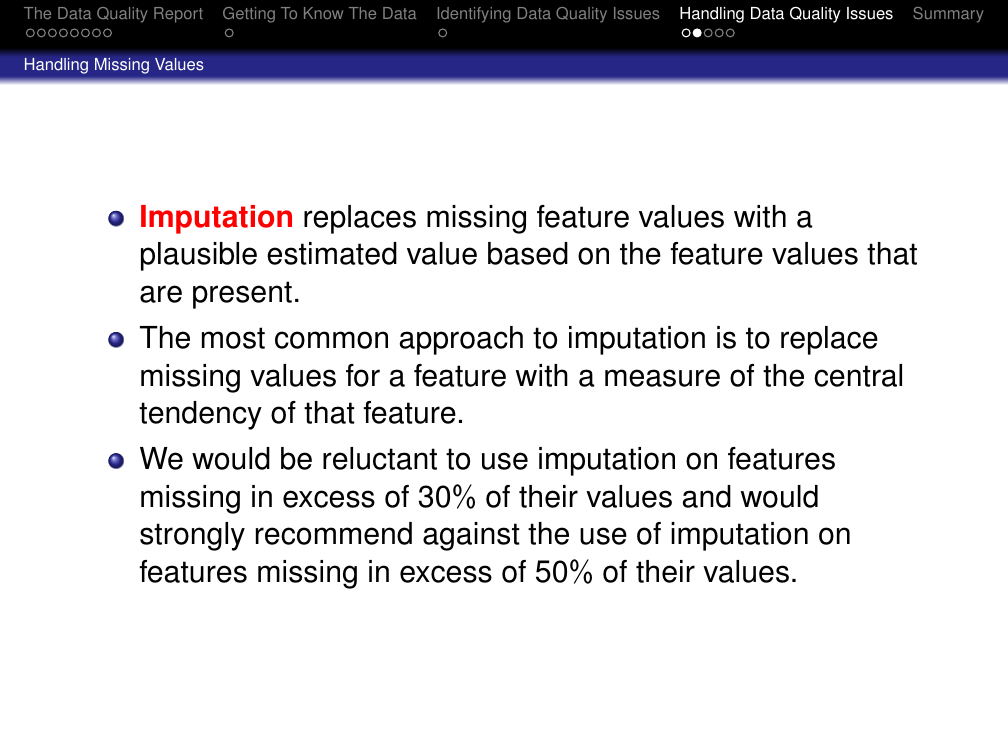

### Outliers

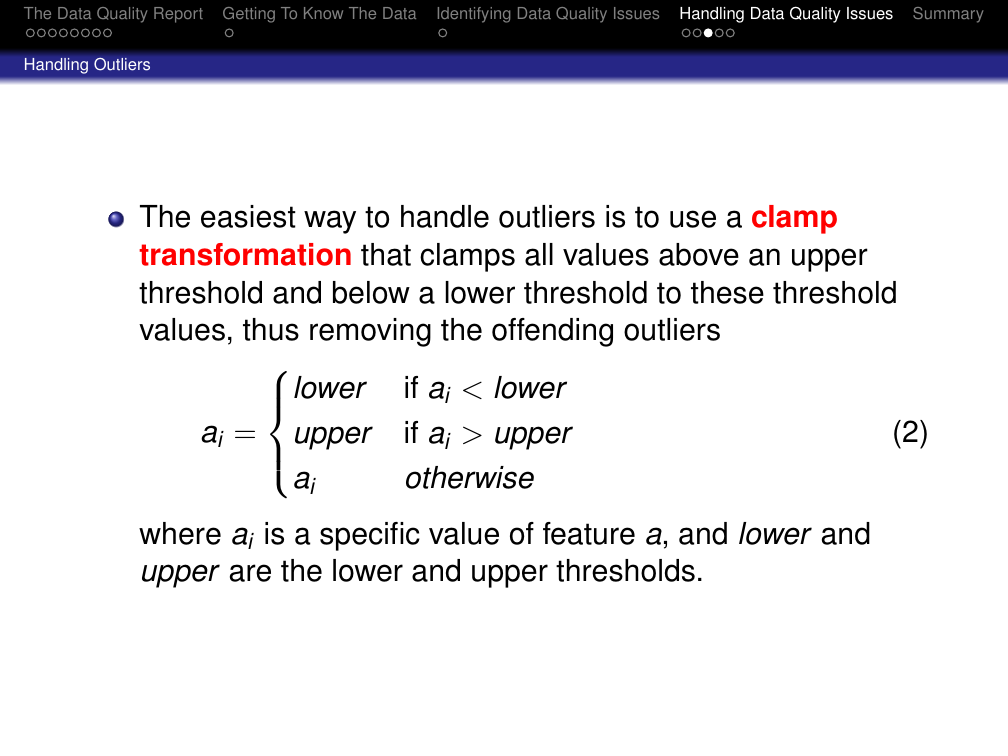

In [ ]:
display_markdown("### Imputation Slide", raw=True)
display_png(slides3A[36],metadata={'width': 600})
display_markdown("### Outliers", raw=True)
display_png(slides3A[37],metadata={'width': 600})
#display_pdf(f'{DSBA_6156_MIDTERM_CONTENT_PATH}slides/BookSlides_3A_Data_Exploration.pdf',metadata={'page_range': (36,37)},raw=True)

#### Missing data

Below are some methods for dealing with missing data (including imputation)

In [ ]:
show_gpt_content("MissingData.gpt.md")

Handling missing data is a critical step in data preprocessing to ensure the accuracy and reliability of analysis and modeling. Here are some common techniques for handling missing continuous and categorical data:

1. **For Continuous Data**:

   a. **Imputation**:
      - Imputation involves filling in missing values with estimated or predicted values.
      - For continuous data, common imputation techniques include:
         - **Mean/Median Imputation**: Replace missing values with the mean or median of the feature.
         - **Linear Regression Imputation**: Predict missing values using a linear regression model trained on non-missing features.
         - **K-Nearest Neighbors (KNN) Imputation**: Predict missing values based on the values of the nearest neighbors in the feature space.
         - **Multiple Imputation**: Generate multiple imputed datasets and pool the results to obtain robust estimates.
      
   b. **Delete**:
      - If missing values are few and randomly distributed, deletion of rows with missing values can be an option.
      - However, deleting rows with missing values can lead to loss of valuable information and potentially bias the analysis if missingness is related to the outcome.
      
   c. **Predictive Models**:
      - Use predictive models, such as decision trees or random forests, to predict missing values based on other features in the dataset.
      - Predictive models can capture complex relationships between variables and provide more accurate imputations than simple statistical measures.

2. **For Categorical Data**:

   a. **Imputation**:
      - For categorical data, missing values can be replaced with the mode (most frequent category) of the feature.
      - Another approach is to create a new category label (e.g., "Unknown" or "Other") to represent missing values.
      
   b. **Delete**:
      - Similar to continuous data, rows with missing categorical values can be deleted if missingness is minimal and randomly distributed.
      
   c. **Predictive Models**:
      - Predictive models such as logistic regression or decision trees can be used to predict missing categorical values based on other features in the dataset.
      - These models can learn relationships between variables and impute missing values more accurately than simple statistical measures.

3. **Combining Techniques**:
   - Sometimes, a combination of imputation and deletion techniques may be appropriate.
   - For example, imputation can be used for missing values below a certain threshold, while rows with a higher proportion of missing values may be deleted.

It's essential to carefully consider the characteristics of the data, the nature of missingness, and the requirements of the analysis when choosing an appropriate technique for handling missing data. Additionally, evaluating the impact of missing data handling techniques on the final analysis or modeling results using cross-validation or other validation methods is advisable.

#### Handling Outliers

In [ ]:
show_gpt_content("Outliers.gpt.md")

Certainly! Here's a comprehensive list of methods for handling outliers, including clamping, along with other techniques mentioned earlier:

1. **Clamp Transformation (Clipping)**:
   - Clamp transformation involves setting a threshold value beyond which data points are truncated or clipped to reduce the influence of extreme values.

2. **Winsorization**:
   - Winsorization replaces extreme values (outliers) with less extreme values, typically the nearest non-outlying value within a certain percentile range.
   - For example, in 10% winsorization, the 5% lowest values are replaced by the value at the 5th percentile, and the 5% highest values are replaced by the value at the 95th percentile.

3. **Trimming**:
   - Trimming involves removing a certain percentage of extreme values from the dataset.
   - Instead of replacing outliers, trimming simply removes them from the dataset, effectively reducing their influence on subsequent analysis.
   
4. **Robust Scaling**:
   - Robust scaling scales data using robust statistics such as the median and interquartile range (IQR) to reduce the influence of outliers.
   - Robust scaling is less sensitive to outliers compared to standard normalization methods like Z-score normalization.

5. **Log Transformation**:
   - Log transformation involves taking the logarithm of skewed data to reduce the influence of outliers and make the distribution more symmetrical.
   - It's particularly effective for data with highly skewed distributions or with a few extremely large values.

6. **Box-Cox Transformation**:
   - The Box-Cox transformation generalizes the log transformation to handle both positive and negative values by introducing a parameter λ.
   - It can transform skewed data to a more normally distributed form, reducing the influence of outliers in the process.

7. **Removing outliers based on statistical methods**:
   - Statistical methods such as Z-score, Tukey's method (using the interquartile range), or Dixon's Q test can be used to detect outliers based on their deviation from the mean or median of the dataset.
   - Outliers identified by these methods can be removed or handled using other techniques mentioned above.

Each of these techniques has its advantages and limitations, and the choice of method depends on factors such as the characteristics of the data, the nature of the outliers, and the specific requirements of the analysis or modeling task. Experimentation and evaluation using validation methods are often necessary to determine the most effective approach for handling outliers in a given dataset.

#### Binning, Normalization and Sampling

In [ ]:
show_gpt_content("BinNormSample.gpt.md")

Certainly! Let's discuss normalization, binning, and sampling techniques, including both under-sampling and over-sampling methods:

1. **Normalization**:
   - **Definition**: Normalization is the process of scaling numerical features to a standard range, typically between 0 and 1 or -1 and 1. It ensures that all features contribute equally to the analysis and prevents features with larger scales from dominating the model.
   - **Methods**: Common normalization techniques include Min-Max Scaling and Z-score Standardization.
     - Min-Max Scaling: Scales features to a range between 0 and 1.
     - Z-score Standardization: Transforms features to have a mean of 0 and a standard deviation of 1.

2. **Binning**:
   - **Definition**: Binning is the process of dividing continuous numerical features into discrete bins or intervals. It can help simplify the model and capture non-linear relationships between variables.
   - **Methods**: 
     - Equal-width binning: Divides the range of values into equal-width intervals.
     - Equal-frequency binning: Divides the data into intervals with an equal number of data points in each interval.
     - Custom binning: Allows for the specification of custom bin boundaries based on domain knowledge or specific requirements.

3. **Sampling Techniques**:
   - **Under-sampling**:
     - **Definition**: Under-sampling involves reducing the number of instances in the majority class to balance the class distribution, particularly in imbalanced datasets where one class dominates the other(s).
     - **Methods**: 
       - Random under-sampling: Randomly removes instances from the majority class until the class distribution is balanced.
       - Cluster-based under-sampling: Identifies clusters within the majority class and removes instances to achieve balance.
       - Tomek links: Removes pairs of instances that are nearest neighbors of opposite classes.
   
   - **Over-sampling**:
     - **Definition**: Over-sampling involves increasing the number of instances in the minority class to balance the class distribution.
     - **Methods**:
       - Random over-sampling: Randomly replicates instances from the minority class to increase its representation.
       - SMOTE (Synthetic Minority Over-sampling Technique): Generates synthetic instances for the minority class by interpolating between existing instances.
       - ADASYN (Adaptive Synthetic Sampling): Similar to SMOTE, but generates more synthetic instances for difficult-to-learn minority instances.

These techniques are essential in data preprocessing and model training to improve the performance and robustness of machine learning models, especially when dealing with imbalanced datasets or features with varying scales.

### <font color="#162">Visualizations</font>

* **Histograms**: *Binned visalization of continuous data*
* **Bar plots**: *Visualize relative frequency of categorical features*
* **Multiple bar plots**: *Side by side comparisons of values across different groups. <font color="#900">**Example**</font>: <font color="#099">Comparing the number of businesses in different industries across Cabbarus and Mecklenberg Counties</font>.*
* **Stacked bar plots**: *Side by side comparisons of components of a value across different groups. <font color="#900">**Example**</font>: <font color="#099">Comparing the number of registered voters across Cabbarus, Iredell, Union, Gaston, Lincoln and Mecklenberg Coiunties and showing the party affiliations as part of the stacked values</font>.*
* **Box and whiskers**: *Shows quartiles and outliers*
* **Scatter plots**: Shows the relationship between two continuous variables
* **Correlations**: *Correlations are generally used to display collinerarity between features*

#### More on Visualizations

Below are code and image samples of each of the aforementioned visualization type.  These are provided as examples of how to code the visualizations; they are not necessarily examples of how they are used.

In [ ]:
show_gpt_content("VizPurpose.gpt.md")

Here's an overview of how each of these visualizations is commonly used in data analysis and visualization:

1. **Histograms**:
   - **Usage**: Histograms are used to represent the distribution of a single continuous variable. They show the frequency or count of data points falling within different intervals or bins of the variable.
   - **Application**: Histograms are useful for understanding the central tendency, spread, and shape of the data distribution, identifying outliers, and detecting patterns such as skewness or multimodality.

2. **Bar Plots**:
   - **Usage**: Bar plots are used to compare the values of categorical variables by displaying the height of bars corresponding to each category.
   - **Application**: Bar plots are effective for visualizing categorical data, showing comparisons between different categories, and identifying trends or patterns across categories.

3. **Multiple Bar Plots**:
   - **Usage**: Multiple bar plots compare multiple groups or conditions across different categories, often side by side.
   - **Application**: Multiple bar plots are useful for visualizing and comparing data across multiple groups or conditions simultaneously, allowing for easy comparison of values between categories and groups.

4. **Stacked Bar Plots**:
   - **Usage**: Stacked bar plots display the composition of each category by stacking bars representing different subgroups or components.
   - **Application**: Stacked bar plots are useful for showing the proportion of each subgroup within categories and comparing the overall composition of categories across different groups or conditions.

5. **Box and Whisker Plots (Boxplots)**:
   - **Usage**: Boxplots summarize the distribution of a continuous variable by displaying key statistics such as the median, quartiles, and outliers.
   - **Application**: Boxplots are helpful for visualizing the spread, central tendency, and variability of data, identifying outliers, comparing distributions between groups, and detecting skewness or symmetry.

6. **Scatter Plots**:
   - **Usage**: Scatter plots display the relationship between two continuous variables by plotting individual data points on a two-dimensional grid.
   - **Application**: Scatter plots are used to visualize patterns, trends, and relationships between variables, including correlations, associations, clusters, and outliers.

7. **Correlations**:
   - **Usage**: Correlation matrices or heatmaps visualize the pairwise correlations between multiple variables in a dataset.
   - **Application**: Correlation visualizations help identify associations and dependencies between variables, indicating the strength and direction of linear relationships. They are useful for feature selection, understanding multicollinearity, and guiding modeling decisions.

These visualizations are powerful tools for exploring, analyzing, and interpreting data, helping to uncover insights, patterns, and relationships that may not be immediately apparent from the raw data. Depending on the nature of the data and the research questions, different visualizations may be more suitable for different tasks and analyses.

### Sample Visualizations

#### Histogram



### Histogram

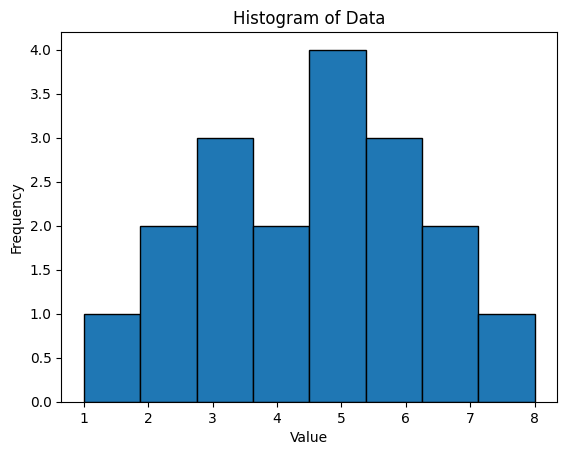

In [ ]:
# Create a histogram
display_markdown("### Histogram", raw=True)
data = [1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 8]
plt.hist(data, bins=8, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

#### Bar Plots

### Bar Plots

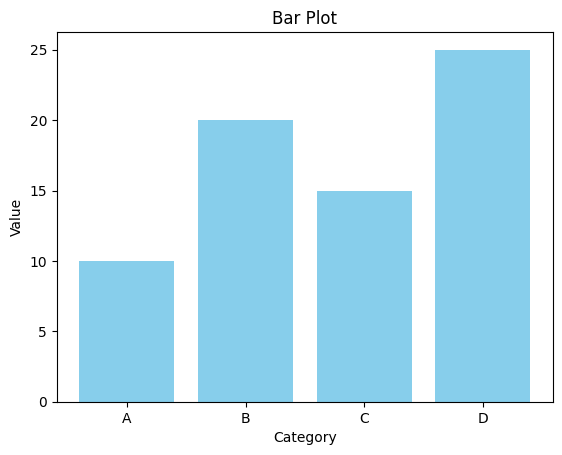

In [ ]:
# Create a bar plot
display_markdown("### Bar Plots", raw=True)
categories = ['A', 'B', 'C', 'D']
values = [10, 20, 15, 25]
plt.bar(categories, values, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Bar Plot')
plt.show()

#### Multiple Bar Plots

### Multiple Bar Plots

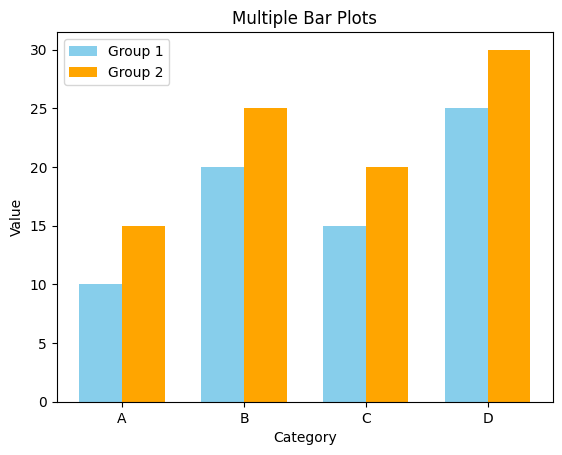

In [ ]:
# Create multiple bar plots
display_markdown("### Multiple Bar Plots", raw=True)
categories = ['A', 'B', 'C', 'D']
values1 = [10, 20, 15, 25]
values2 = [15, 25, 20, 30]

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, values1, width, label='Group 1', color='skyblue')
bar2 = ax.bar(x + width/2, values2, width, label='Group 2', color='orange')

ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.set_title('Multiple Bar Plots')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.show()


#### Stacked Bar Plots

### Stacked Bar Plots

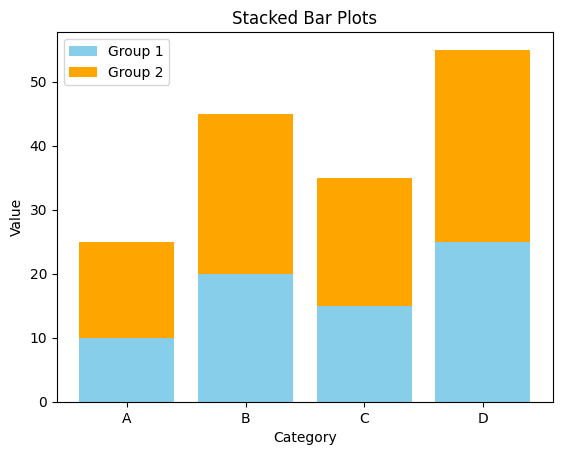

In [ ]:
# Create stacked bar plots
display_markdown("### Stacked Bar Plots",raw=True)
categories = ['A', 'B', 'C', 'D']
values1 = [10, 20, 15, 25]
values2 = [15, 25, 20, 30]

x = np.arange(len(categories))

plt.bar(categories, values1, label='Group 1', color='skyblue')
plt.bar(categories, values2, bottom=values1, label='Group 2', color='orange')

plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Stacked Bar Plots')
plt.legend()
plt.show()

#### Box and Whisker Plot

### Box and Whisker Plot

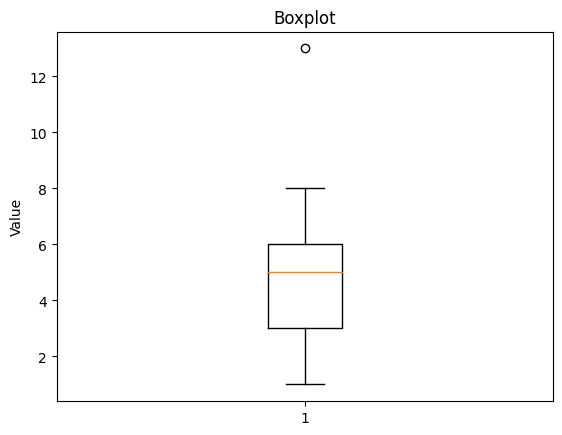

In [ ]:
# Create a boxplot
display_markdown("### Box and Whisker Plot",raw=True)
data = [1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 8, 13]
plt.boxplot(data)
plt.ylabel('Value')
plt.title('Boxplot')
plt.show()

#### Scatter Plot

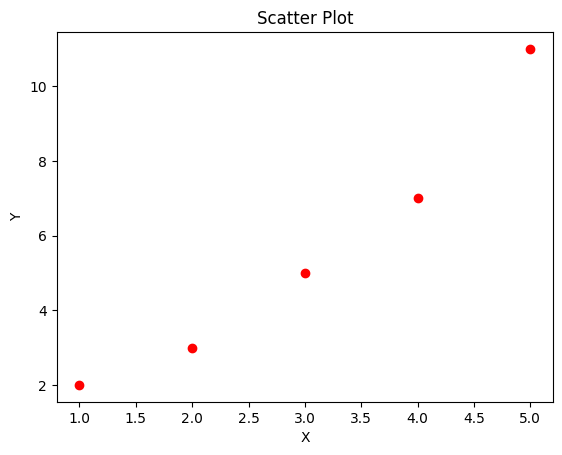

In [ ]:
# Create a scatter plot
display_markdown("### Scatter Plot")
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]
plt.scatter(x, y, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')
plt.show()


#### Correlation Heatmap

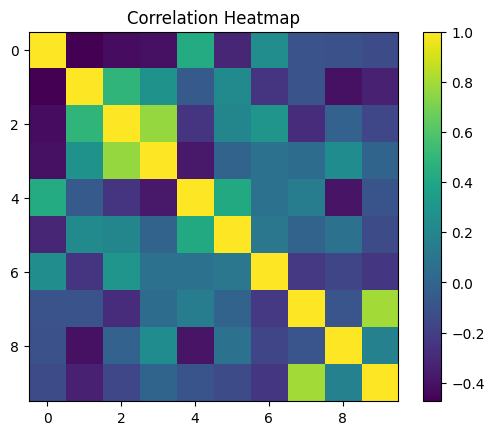

In [ ]:
# Generate random data for correlation heatmap
data = np.random.rand(10, 10)
df=pd.DataFrame(data)
cm=df.corr(numeric_only=True)

# Create a correlation heatmap
display_markdown("### Correlation Heatmap")
plt.imshow(cm, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Heatmap')
plt.show()

## Information Based Learning

### Useful Functions

These will be used in the example below but separating them out

In [ ]:
import math
def plogp(x):
    return 0 if x == 0 else - x * math.log(x,2)

# *args accepts an arbitrary number of positional arguments
def entropy(*args):
    total=sum(args)
    e = 0
    for arg in args:
      e += plogp(arg/total)
    return e

### <font color="#162">Building the Tree</font>

* Relationship between Entropy and Probability
* Information gain
  * **Initial Entropy**: $$ H(T) = -\sum_{i=1}^{n} p_i \log_2(p_i)$$ where $p_i$ represents the probability of class $i$ in the dataset.
  * **Remainder Entropy**: *Is the sum of the entropy of each partitiom multiplied by the ratio of the partition*   $$ H(T|A) = \sum_{j=1}^{m} \frac{|S_j|}{|S|} H(S_j) $$ where $S$ is the original dataset, $S_j$ are the subsets resulting from the split, $|S_j|$ represents the number of instances in subset $S_j$, and $H(S_j)$ is the entropy of subset $S_j$.
  * **How are the above used**: *The information gain is the difference between the initial entropy and the remaining entropy*
* **Trees**: *The opening entropy is based upon the randomness of target variable.  If target variable is uniform then the entropy is 0 and there is no information to be gained.  <font color="#009999">That may also mean that for an unbalanced set of target classes, information gain opportunities may be scarce.</font> The goal is to reduce randomness as much as possible for each new level.  Each segment should have as uniform a set of value for the target variable as possible*
* **Handling continuous targets and features**:
  * *Targets will be discrete values that represent the average of a range*
  * *Features will be thresholds that can be changed at each level*
* **Pruning**
  * **Why prune**: *Avoid overfitting*
  * **Pre pruning**: *Pre-pruning helps prevent the model from memorizing noise in the training data and improves its generalization performance on unseen data*
  * **Post pruning**: *Post-pruning helps simplify the decision tree and reduce its complexity while maintaining or improving predictive accuracy on unseen data.*
  * **How are they different?**: *With pre-pruning you stop before the tree gets to complex. Post-pruning trims the tree after the fact by removing nodes that do not contribute to model accuracy*

#### From the Interwebs

Below is a [good description of how decision trees work](https://www.saedsayad.com/decision_tree.htm).

In [ ]:
display(IFrame("https://www.saedsayad.com/decision_tree.htm",1000,600))

#### From the Slides

### Computing Information Gain

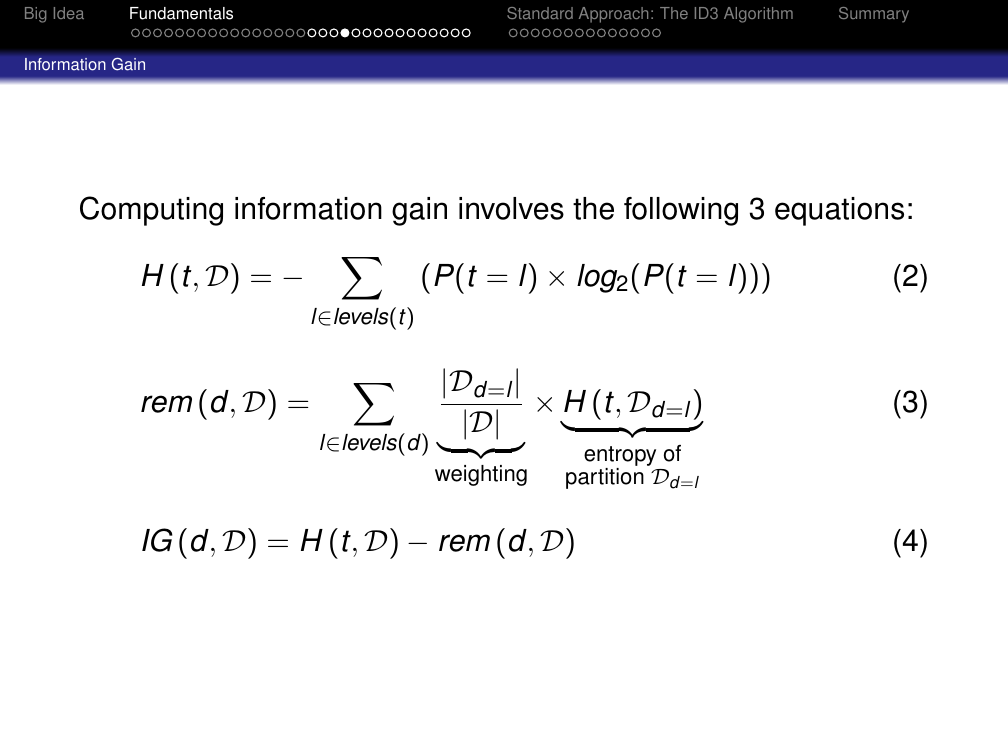

In [ ]:
display_markdown("### Computing Information Gain", raw=True)
display_png(slides4A[32], metadata={'width': 600})

#### Continuous Feature and Targets and Pruning

In [ ]:
show_gpt_content("DTPrune.gpt.md")

Decision trees can handle both continuous targets (for regression problems) and continuous features. Here's how decision trees work with continuous targets and features, along with the concepts of pre-pruning and post-pruning:

1. **Continuous Targets**:
   - For regression tasks, decision trees predict continuous values (e.g., house prices, temperature) instead of discrete classes.
   - Decision trees split the data based on feature thresholds to minimize the variance of the target variable within each split.
   - When making predictions, decision trees typically return the average (or another metric, such as median) of the target values of the training instances in the leaf node reached by the input instance.

2. **Continuous Features**:
   - Decision trees can handle continuous features by selecting optimal thresholds to split the data during training.
   - The algorithm considers all possible thresholds for each feature and selects the one that maximally reduces the impurity (e.g., variance, mean squared error) of the target variable.
   - This process is repeated recursively for each node until a stopping criterion is met (e.g., maximum depth reached, minimum samples per leaf).

3. **Pre-pruning**:
   - Pre-pruning involves stopping the growth of the decision tree before it becomes too complex or overfits the training data.
   - Common pre-pruning techniques include limiting the maximum depth of the tree, setting a minimum number of samples required to split a node, or requiring a minimum decrease in impurity to perform a split.
   - Pre-pruning helps prevent the model from memorizing noise in the training data and improves its generalization performance on unseen data.

4. **Post-pruning**:
   - Post-pruning, also known as tree pruning, involves growing the decision tree to its maximum size and then removing or collapsing nodes that do not contribute significantly to improving predictive performance.
   - Post-pruning techniques typically involve recursively examining each node in the tree and evaluating the impact of removing it on a validation set or using a pruning criterion (e.g., reduced error pruning).
   - Post-pruning helps simplify the decision tree and reduce its complexity while maintaining or improving predictive accuracy on unseen data.

In summary, decision trees can handle both continuous targets and features in regression tasks. Pre-pruning and post-pruning are techniques used to prevent overfitting and improve the generalization performance of decision tree models by controlling their complexity and structure.

### <font color=#162>Khalil's Decision Tree Example in Python</font>

<font color="#900">***Expand the heading above to see the code and output***</font>

The cell will execute analyze the decision tree from the example in the announcements.

Here is the data:

<img src="https://drive.google.com/uc?id=1sX0mEF4OSx6zpKGGV-ZFKUwqE_gyNaX6" alt="For Example" width="600" height="auto" />


In [ ]:
# Imports
import sys
import math
import copy
from enum import Enum, auto
import time
import json
import pandas as pd

# Set up some useful utilities

# Log output with timestamps
def ilog(msg):
  sys.stderr.write( time.strftime('%Y-%m-%d %X') + ": " + str(msg) + "\n")
  sys.stderr.flush()

# Convert enum to string
def convert_enum_to_string(value):
    return value.name

# Get rows from DataFrame that has a specific value in a specific column
def rows_with_val(df, col, val):
  return df[df[col.name] == val.name]

# Get the count of rows from DataFrame that has a specific value in a specific column
def count_rows_with_val(df, col, val):
  return rows_with_val(df, col, val).shape[0]

# Set up enums if you are hard coding categorical values...
# setting up enums may be useful in avoiding typos
class FeaturesAndTargets(Enum):
  PreferedProductCategory = auto()
  MembershipType = auto()
  PurchaseFrequency = auto()
  CustomerSegment = auto()

class PreferedProductCategory(Enum):
  Electronics = auto()
  Clothing = auto()
  HomeAndFurniture = auto()

class MembershipType(Enum):
  Premium = auto()
  Basic = auto()

class PurchaseFrequency(Enum):
  High = auto()
  Medium = auto()
  Low = auto()

class CustomerSegment(Enum):
  FrequentBuyer = auto()
  RegularBuyer = auto()
  Casual = auto()

# Set up the data
data = [
    {
        FeaturesAndTargets.PreferedProductCategory: PreferedProductCategory.Electronics,
        FeaturesAndTargets.MembershipType: MembershipType.Premium,
        FeaturesAndTargets.PurchaseFrequency: PurchaseFrequency.High,
        FeaturesAndTargets.CustomerSegment: CustomerSegment.FrequentBuyer
    },
    {
        FeaturesAndTargets.PreferedProductCategory: PreferedProductCategory.Clothing,
        FeaturesAndTargets.MembershipType: MembershipType.Basic,
        FeaturesAndTargets.PurchaseFrequency: PurchaseFrequency.Low,
        FeaturesAndTargets.CustomerSegment: CustomerSegment.Casual
    },
    {
        FeaturesAndTargets.PreferedProductCategory: PreferedProductCategory.HomeAndFurniture,
        FeaturesAndTargets.MembershipType: MembershipType.Premium,
        FeaturesAndTargets.PurchaseFrequency: PurchaseFrequency.Medium,
        FeaturesAndTargets.CustomerSegment: CustomerSegment.RegularBuyer
    },
    {
        FeaturesAndTargets.PreferedProductCategory: PreferedProductCategory.Electronics,
        FeaturesAndTargets.MembershipType: MembershipType.Basic,
        FeaturesAndTargets.PurchaseFrequency: PurchaseFrequency.High,
        FeaturesAndTargets.CustomerSegment: CustomerSegment.FrequentBuyer
    },
    {
        FeaturesAndTargets.PreferedProductCategory: PreferedProductCategory.Clothing,
        FeaturesAndTargets.MembershipType: MembershipType.Premium,
        FeaturesAndTargets.PurchaseFrequency: PurchaseFrequency.Low,
        FeaturesAndTargets.CustomerSegment: CustomerSegment.Casual
    }

]

# Load up the data into a DataFrame
df = pd.DataFrame(data)

# Map the values to strings
df = df.applymap(convert_enum_to_string)

# Map the column Names to strings
df.columns = df.columns.map(lambda x: x.name)

display_markdown("## Data Frame", raw=True)
display(df)

display_markdown("## Initial Entropy", raw=True)
val_counts = list()

# Get the list of counts of target classes
for val in CustomerSegment:
  val_counts.append(count_rows_with_val(df,FeaturesAndTargets.CustomerSegment,val))

# Calculate the initial entropy
# Note *val_counts passes individual arguments rather than a list because
# our entropy function an arbitrary number of non-list arguments
init_ent = entropy(*val_counts)

ilog(f'Initial Entropy = {init_ent}')


# Calculate and display Entropy Based upon Prefered Product Category
display_markdown("## Information Gain for Prefered Product Category", raw=True)
ppc_remainder_entropy=0
for val in PreferedProductCategory:
  all_row_count = df.shape[0]

  # Get the rows that match the Perfered Product Category
  my_df = rows_with_val(df,FeaturesAndTargets.PreferedProductCategory,val)
  my_rows_count = my_df.shape[0]

  # Get the Entropy of the this particular partition
  val_counts = list()
  for res in CustomerSegment:
    val_counts.append(count_rows_with_val(my_df,FeaturesAndTargets.CustomerSegment,res))

  current_ent = entropy(*val_counts)
  ilog(f'Row counts: {val_counts} | Entropy for {val.name}: {current_ent}')
  ppc_remainder_entropy += current_ent * my_rows_count / all_row_count

ilog(f'Prefered Product Category: Remainder Entropy = {ppc_remainder_entropy} | Information Gain = {init_ent - ppc_remainder_entropy}')

# Calculate and display Entropy Based upon Membership Type
display_markdown("## Information Gain for Membership Type", raw=True)
mt_remainder_entropy=0
for val in MembershipType:
  all_row_count = df.shape[0]

  # Get the rows that match the Membership Type
  my_df = rows_with_val(df,FeaturesAndTargets.MembershipType,val)
  my_rows_count = my_df.shape[0]

  # Get the Entropy of the this particular partition
  val_counts = list()
  for res in CustomerSegment:
    val_counts.append(count_rows_with_val(my_df,FeaturesAndTargets.CustomerSegment,res))

  current_ent = entropy(*val_counts)
  ilog(f'Row counts: {val_counts} | Entropy for {val.name}: {current_ent}')
  mt_remainder_entropy += current_ent * my_rows_count / all_row_count

ilog(f'Membership Type: Remainder Entropy = {mt_remainder_entropy} | Information Gain = {init_ent - mt_remainder_entropy}')

# Calculate and display Entropy Based upon Purchase Frequency
display_markdown("## Information Gain for Purchase Frequency", raw=True)
pf_remainder_entropy=0
for val in PurchaseFrequency:
  all_row_count = df.shape[0]

  # Get the rows that match the Purchase Frequency
  my_df = rows_with_val(df,FeaturesAndTargets.PurchaseFrequency,val)
  my_rows_count = my_df.shape[0]

  # Get the Entropy of the this particular partition
  val_counts = list()
  for res in CustomerSegment:
    val_counts.append(count_rows_with_val(my_df,FeaturesAndTargets.CustomerSegment,res))

  current_ent = entropy(*val_counts)
  ilog(f'Row counts: {val_counts} | Entropy for {val.name}: {current_ent}')
  pf_remainder_entropy += current_ent * my_rows_count / all_row_count

ilog(f'Purchase Frequency: Remainder Entropy = {pf_remainder_entropy} | Information Gain = {init_ent - pf_remainder_entropy}')


## Data Frame

,PreferedProductCategory,MembershipType,PurchaseFrequency,CustomerSegment
0,Electronics,Premium,High,FrequentBuyer
1,Clothing,Basic,Low,Casual
2,HomeAndFurniture,Premium,Medium,RegularBuyer
3,Electronics,Basic,High,FrequentBuyer
4,Clothing,Premium,Low,Casual


## Initial Entropy

2024-02-25 06:05:12: Initial Entropy = 1.5219280948873621


## Information Gain for Prefered Product Category

2024-02-25 06:05:12: Row counts: [2, 0, 0] | Entropy for Electronics: 0.0
2024-02-25 06:05:12: Row counts: [0, 0, 2] | Entropy for Clothing: 0.0
2024-02-25 06:05:12: Row counts: [0, 1, 0] | Entropy for HomeAndFurniture: 0.0
2024-02-25 06:05:12: Prefered Product Category: Remainder Entropy = 0.0 | Information Gain = 1.5219280948873621


## Information Gain for Membership Type

2024-02-25 06:05:12: Row counts: [1, 1, 1] | Entropy for Premium: 1.584962500721156
2024-02-25 06:05:12: Row counts: [1, 0, 1] | Entropy for Basic: 1.0
2024-02-25 06:05:12: Membership Type: Remainder Entropy = 1.3509775004326938 | Information Gain = 0.17095059445466831


## Information Gain for Purchase Frequency

2024-02-25 06:05:12: Row counts: [2, 0, 0] | Entropy for High: 0.0
2024-02-25 06:05:12: Row counts: [0, 1, 0] | Entropy for Medium: 0.0
2024-02-25 06:05:12: Row counts: [0, 0, 2] | Entropy for Low: 0.0
2024-02-25 06:05:12: Purchase Frequency: Remainder Entropy = 0.0 | Information Gain = 1.5219280948873621


### <font color="#162">Model Ensembles</font>

* **Why do we use them?**: *To create composite models that when combined perform better that any of the individual models.*
* Different Techniques
  * **Random Forest**: *Combine the predictions from multiple Decision Trees*
  * **Boosting**: *Combine Multiple Weak Learners to make a strong learner*
  * **Gradient Boosting**: *Builds trees sequentially, where each tree corrects the errors made by the previous one by optimizing a loss function using gradient descent.*
  * **Decision Stumps**: *Decision Stumps are shallow decision trees with a single split, often used as weak learners in ensemble methods due to their simplicity and computational efficiency.*

#### From Slides

### Boosting

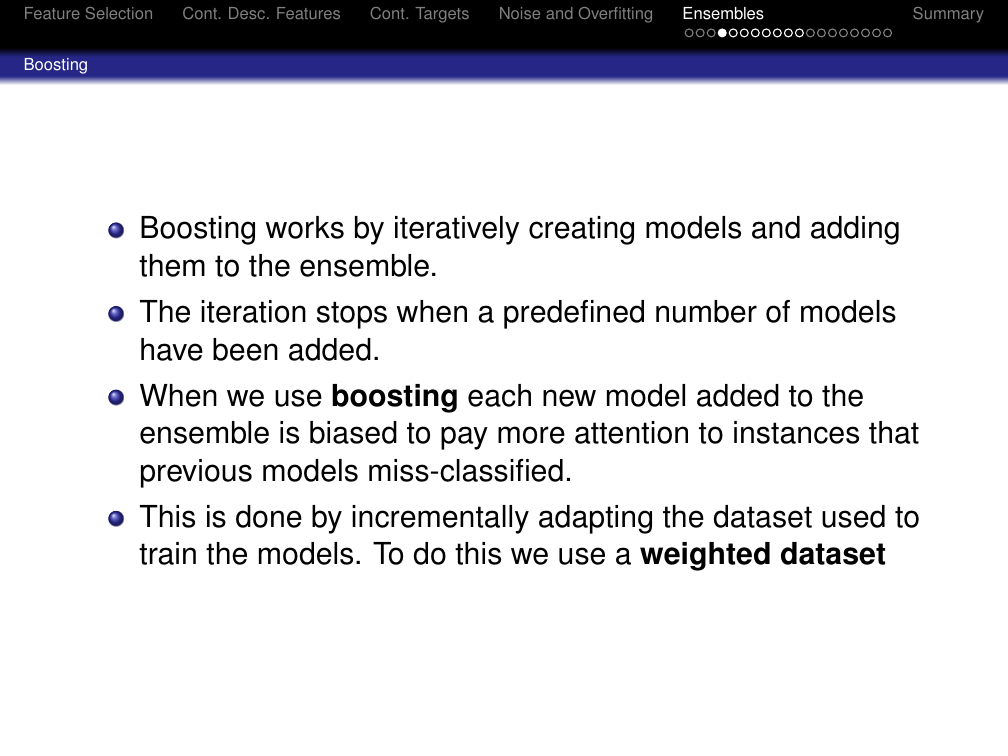

In [ ]:
display_markdown("### Boosting", raw=True)
display_png(slides4B[42],metadata={'width': 600})

#### More on ensembles

In [ ]:
show_gpt_content("Ensemble.gpt.md")

**How Ensemble Models are Used**

Ensemble methods are powerful techniques used in machine learning to improve predictive performance by combining the predictions of multiple base models. While they are commonly used in information-based learning (like classification and regression tasks), they can also be applied to other types of problems, such as clustering or anomaly detection.

Here's an overview of popular ensemble methods, including Random Forest, boosting (which includes Adaboost and gradient boosting), decision stumps, bagging, stacking, and voting:

1. **Random Forest**:
   - Random Forest is an ensemble learning method based on decision trees.
   - It builds multiple decision trees during training and combines their predictions through averaging or voting to improve predictive accuracy and reduce overfitting.
   - Randomness is introduced during tree construction by selecting random subsets of features and data samples.
   - Random Forest is robust to noise and outliers and performs well on high-dimensional datasets.

2. **Boosting**:
   - Boosting is a meta-algorithm that combines multiple weak learners to create a strong learner.
   - It iteratively trains base models (typically decision trees) on weighted versions of the dataset, where weights are adjusted to focus on previously misclassified instances.
   - Popular boosting algorithms include Adaboost (Adaptive Boosting) and Gradient Boosting.
   
3. **Adaboost (Adaptive Boosting)**:
   - Adaboost is a boosting algorithm that sequentially trains weak learners and adjusts the weights of misclassified instances.
   - It assigns higher weights to misclassified instances in subsequent iterations to improve their classification in the next model.
   - Adaboost combines the predictions of weak learners using weighted majority voting.

4. **Gradient Boosting**:
   - Gradient Boosting is a boosting algorithm that builds trees sequentially, where each tree corrects the errors made by the previous one.
   - Unlike Adaboost, Gradient Boosting optimizes a loss function using gradient descent.
   - It typically uses shallow decision trees as base learners and combines their predictions through additive modeling.

5. **Decision Stumps**:
   - Decision Stumps are shallow decision trees with a single split.
   - They are often used as weak learners in ensemble methods due to their simplicity and computational efficiency.
   - Decision Stumps are particularly useful in boosting algorithms.

6. **Bagging**:
   - Bagging (Bootstrap Aggregating) is an ensemble method that trains multiple base models independently on bootstrapped samples of the training data.
   - It combines the predictions of base models through averaging or voting to reduce variance and improve generalization.
   - Random Forest is an example of a bagging algorithm.

7. **Stacking**:
   - Stacking (Stacked Generalization) combines the predictions of multiple base models using a meta-model (or a blender).
   - Instead of simple averaging or voting, stacking uses the predictions of base models as features to train a higher-level model that makes the final prediction.
   - Stacking can capture complex relationships between base models and improve predictive performance.

8. **Voting**:
   - Voting is a simple ensemble method that combines the predictions of multiple base models through majority voting (for classification) or averaging (for regression).
   - It is often used as a basic ensemble approach to improve model robustness and reduce overfitting.

These ensemble methods are widely used in practice to enhance the performance, stability, and robustness of machine learning models across various domains and types of problems. They leverage the diversity of base models to collectively make more accurate predictions than any individual model could achieve alone.

**Why are they Important**

Ensemble methods are important in machine learning for several reasons:

1. **Improved Predictive Performance**: Ensemble methods typically result in models with higher predictive accuracy compared to individual base models. By combining the predictions of multiple models, ensemble methods can effectively reduce bias and variance, leading to more robust and reliable predictions.

2. **Reduction of Overfitting**: Ensemble methods help mitigate overfitting, especially in complex models or when dealing with high-dimensional data. By combining multiple models trained on different subsets of the data or using different learning algorithms, ensemble methods reduce the likelihood of capturing noise or idiosyncrasies present in individual models.

3. **Increased Model Robustness**: Ensemble methods are inherently more robust to outliers and noisy data compared to single models. By aggregating predictions from multiple models, ensemble methods can smooth out inconsistencies and errors, leading to more stable and reliable predictions across different datasets and scenarios.

4. **Versatility Across Domains**: Ensemble methods are versatile and can be applied to various types of machine learning tasks, including classification, regression, clustering, and anomaly detection. They are not limited to specific types of data or problem domains, making them widely applicable in real-world scenarios.

5. **Complementary Learning**: Ensemble methods leverage the diversity of base models to capture different aspects of the underlying data distribution. Each base model may excel in capturing certain patterns or relationships within the data, and ensemble methods combine these diverse perspectives to make more informed and accurate predictions.

6. **Interpretability and Transparency**: In some cases, ensemble methods can improve model interpretability by providing insights into the underlying structure of the data. For example, feature importance measures in ensemble methods like Random Forest can help identify the most influential variables in the prediction process.

7. **State-of-the-Art Performance**: Ensemble methods have been shown to achieve state-of-the-art performance in various machine learning competitions and benchmarks. They are widely used in both academic research and industry applications across different domains, demonstrating their effectiveness and practical utility.

Overall, ensemble methods play a crucial role in advancing the field of machine learning by improving predictive accuracy, reducing overfitting, enhancing model robustness, and enabling the development of high-performance predictive models for a wide range of applications.

**Usage in non Information Based Learning**

Ensemble methods can indeed be applied beyond information-based learning tasks like classification and regression. They can also be utilized in various other types of machine learning tasks, including those that involve linear models, non-linear models, instance-based learning, rule-based learning, probabilistic models, and hybrid models. Here's how ensemble methods can be applied in each of these contexts:

1. **Linear Models**:
   - For linear models, ensemble methods can be applied by combining multiple linear models trained on different subsets of the data or using different regularization parameters.
   - Ensemble techniques like bagging can help reduce the variance of linear models and improve their predictive performance.
   - Stacking can be used to combine the predictions of linear models with those of other types of models, such as non-linear models or instance-based models.

2. **Non-linear Models**:
   - In the case of non-linear models, ensemble methods are commonly applied to combine multiple base models, such as decision trees, neural networks, or support vector machines (SVMs), to capture complex relationships in the data.
   - Random Forest is a popular ensemble method for combining multiple decision trees to create a powerful non-linear model.
   - Gradient boosting and AdaBoost can also be applied to boost the performance of non-linear models by sequentially training weak learners and combining their predictions.

3. **Instance-based Learning**:
   - Ensemble methods can enhance instance-based learning algorithms like k-nearest neighbors (KNN) by combining the predictions of multiple instances or subsets of instances.
   - Techniques such as bagging and random subspace method can be applied to KNN to improve its robustness and generalization performance.
   - Stacking can also be used to combine the predictions of instance-based models with those of other types of models to achieve better predictive performance.

4. **Rule-based Learning**:
   - In rule-based learning, ensemble methods can be used to combine multiple rule sets or decision lists to create a more robust and accurate predictive model.
   - Bagging and boosting techniques can be applied to rule-based classifiers to improve their performance by reducing overfitting and capturing complementary patterns in the data.
   - Stacking can combine the predictions of rule-based models with those of other types of models to achieve better predictive performance.

5. **Probabilistic Models**:
   - Ensemble methods can be applied to probabilistic models by combining the predictions of multiple probabilistic classifiers or models.
   - Techniques such as bagging and boosting can be used to aggregate the probabilistic predictions of multiple models and improve the overall predictive accuracy.
   - Stacking can combine the probabilistic predictions of different models using a meta-model to achieve better calibration and discrimination.

6. **Hybrid Models**:
   - Ensemble methods are well-suited for combining different types of models into hybrid models that leverage the strengths of each individual model.
   - Techniques such as stacking can be used to combine the predictions of linear, non-linear, instance-based, rule-based, and probabilistic models into a single hybrid model.
   - Hybrid models can achieve superior predictive performance by leveraging the complementary strengths of different types of models and effectively capturing complex patterns in the data.

In summary, ensemble methods can be applied to a wide range of machine learning tasks beyond traditional information-based learning, including linear models, non-linear models, instance-based learning, rule-based learning, probabilistic models, and hybrid models. They offer a flexible and powerful approach to improving predictive performance and robustness across diverse problem domains and types of data.

## Similarity Based Learning

### <font color="#162">Eager Vs Lazy Learners</font>

*Even models have different types of learners!*

<font color="#900">*Lazy Learners do not have a separate training phase*</font>

**Note**: *Maybe this should be in the comparing Models section?*

* Learning types of different models
  * **kNN**: *Lazy*
  * **Decision Tree**: *Eager*
  * **Linear Regression**: *Eager*
  * **Naive Bayes**: *Eager*

#### More on Learning types

In [ ]:
show_gpt_content("LearningType.gpt.md")

Apologies for any confusion. Let me clarify the distinction between eager and lazy learners and categorize KNN, Decision Trees (DT), Linear Regression, and Naive Bayes according to their learning behavior:

1. **Eager Learners**:
   - Eager learners, also known as eager learning algorithms, are models that build a general model of the training data during the training phase. This means that eager learners construct a representation of the training data that is independent of the specific queries or instances they will encounter during prediction.
   - Eager learners are characterized by having a separate training phase and a separate prediction (or inference) phase.
   - Examples of eager learners include Decision Trees, Linear Regression, and Naive Bayes.

2. **Lazy Learners**:
   - Lazy learners, also known as lazy learning algorithms, do not build a general model of the training data during the training phase. Instead, they defer the processing of the training data until the prediction phase.
   - Lazy learners store the training data and use it directly during prediction to make decisions or predictions for new instances.
   - Lazy learners do not have a separate training phase; they simply memorize the training data and perform computations at prediction time.
   - Examples of lazy learners include k-Nearest Neighbors (KNN).

Here's a summary of how each of the mentioned algorithms learns:

- **K-Nearest Neighbors (KNN)**:
  - KNN is a lazy learner.
  - During training, KNN simply memorizes the training data.
  - During prediction, KNN finds the k nearest neighbors of a new instance based on a distance metric (e.g., Euclidean distance) and makes predictions based on the majority class or average value of these neighbors.

- **Decision Trees (DT)**:
  - Decision Trees are eager learners.
  - During training, Decision Trees recursively split the feature space based on the feature that maximally reduces impurity (e.g., Gini impurity or entropy).
  - Decision Trees create a tree structure representing the decision boundaries learned from the training data.
  - During prediction, Decision Trees traverse the tree structure based on the features of the new instance to make predictions.

- **Linear Regression**:
  - Linear Regression is an eager learner.
  - During training, Linear Regression learns the coefficients of the linear relationship between the input features and the target variable.
  - Linear Regression creates a linear model that represents the best-fit line or hyperplane in the feature space.
  - During prediction, Linear Regression applies the learned coefficients to new instances to make predictions based on the linear model.

- **Naive Bayes**:
  - Naive Bayes is an eager learner.
  - During training, Naive Bayes estimates the probability distributions of the features conditioned on the class labels using the training data.
  - Naive Bayes applies Bayes' theorem and assumes that features are conditionally independent given the class labels.
  - During prediction, Naive Bayes computes the posterior probability of each class given the features of a new instance and selects the class with the highest probability as the prediction.

In summary, while both eager and lazy learners have their advantages and disadvantages, understanding their learning behavior is crucial for selecting the appropriate algorithm for a given task. Eager learners typically require more computational resources during training but are faster at prediction time, while lazy learners have lower training time but may be slower during prediction due to the need to compute distances or similarities for each new instance.

### <font color="#162">Tuning kNN Model</font>

* Fit (over/under)
  * **How do low k values impact the model**? *Low values can lead to overfitting*
  * **How do high k values impact the model**? *High values can lead to overfitting*
* Weighted kNN
  * **What does it do?**: *The contribution of the selected neighbors are most typically weighted by the inverse of the distance, so rather than one vote per neighbor, each neighbor has a weighted vote.*
  * **How does it improve results**: *By tying the distance of each voting neighbor to its relevance in the decision process, this may improve the accuracy of the results*.
  * **Discuss k sensitivity**: *In general the same dymaics of over/under fitting are present, but they are mitigated by weighting.  <font color='#099'>ML gives us the ability to try different values of k (and even different weighting schemes) to find more optimal solutions*</font>
* Normalization: **Note**: *Maybe this should be in the comparing Models section?*
  * **What is it**: Normalization is the process of scaling numerical features to a standard range, typically between 0 and 1 or -1 and 1.
  * **Why is it important**
    * **for kNN?**: *kNN's Euclidean Distances are very sensative to imbalances in the range of different features*
    * **In general**: *It ensures that all features contribute equally to the analysis and prevents features with larger scales from dominating the models

#### More on Weighted kNN

In [ ]:
show_gpt_content("WeightedKNN.gpt.md")

Weighted k-Nearest Neighbors (kNN) is an extension of the traditional kNN algorithm where the contributions of neighboring points to the classification (or regression) decision are weighted by their distance to the query point. This weighting scheme allows points closer to the query point to have a greater influence on the prediction than points that are farther away.

In weighted k-Nearest Neighbors (kNN), the votes are weighted based on the distances of the neighbors to the query point. The general idea is that closer neighbors contribute more to the decision-making process than farther neighbors. There are various methods to assign weights to the neighbors' votes, *but one common approach is to use the inverse of the distance as the weight*.

Here's a simple explanation of how the votes are weighted:

1. **Compute Distances**: For each query point, calculate the distance to all the training data points using a distance metric like Euclidean distance, Manhattan distance, etc.

2. **Find Nearest Neighbors**: Select the k nearest neighbors based on the computed distances.

3. **Assign Weights**: Calculate weights for each of the k neighbors. A common choice is to assign weights inversely proportional to the distance, meaning closer neighbors get higher weights while farther neighbors get lower weights. The formula for the weight $w_i$ of the $i$th neighbor can be represented as:
$$
 w_i = \frac{1}{d_i}
$$


   Where $d_i$ is the distance of the $i$th neighbor to the query point.

4. **Vote**: Each neighbor's vote is weighted by its assigned weight. The class label of the query point is then determined by aggregating the weighted votes of the neighbors, often through a simple majority or weighted sum.

This weighting scheme allows the algorithm to give more influence to neighbors that are closer to the query point, effectively capturing the local structure of the data. Different weighting schemes can also be used depending on the specific requirements of the problem or the characteristics of the dataset.



### How Weighted kNN Improves Results:

1. **Handling Imbalanced Data**: Weighted kNN helps address the issue of imbalanced datasets where certain classes are underrepresented. By assigning weights based on distance, it can ensure that the contributions of neighboring points from each class are proportional to their relevance, potentially leading to more accurate predictions.

2. **More Informed Decision Boundary**: By considering the distance of neighboring points, weighted kNN can better capture the local structure of the data. This leads to a more informed decision boundary, especially in regions where classes are densely packed or where class distributions are irregular.

3. **Reducing Influence of Outliers**: Weighted kNN reduces the influence of outliers by assigning lower weights to points that are far away from the query point. This can make the algorithm more robust to noisy data.

### Sensitivity to k:

The choice of the parameter k in kNN (whether weighted or not) can significantly impact the performance of the algorithm:

- **Smaller k**: Using a smaller value of k leads to a more flexible decision boundary that is sensitive to local fluctuations in the data. This can make the model more prone to overfitting, especially when the dataset contains noise or outliers.

- **Larger k**: On the other hand, using a larger value of k leads to a smoother decision boundary that is less sensitive to noise in the data. However, it may also lead to oversmoothing, where the model fails to capture local patterns in the data.

In the case of weighted kNN, the sensitivity to k is similar to that of traditional kNN. However, the impact of each neighbor's weight on the final prediction should also be considered. In general, it's recommended to experiment with different values of k (and possibly different distance metrics) to find the optimal balance between bias and variance for a given dataset. Cross-validation techniques can also help in selecting the best value of k.

#### Importance of Normalization for kNN

In [ ]:
show_gpt_content("NormalizationKNN.gpt.md")

Normalization is important for k-Nearest Neighbors (KNN) because it ensures that the distances between data points are calculated accurately and fairly. Since KNN relies on the concept of distance (such as Euclidean distance) to find the nearest neighbors, the scale of the features directly affects the distance calculations. Here's why normalization is important for KNN:

1. **Prevents Features Dominance**: In KNN, features with larger scales can dominate the distance calculations. For example, if one feature has a scale ranging from 0 to 1000, while another feature ranges from 0 to 1, the distance will be primarily determined by the first feature. Normalizing the features prevents this issue by bringing all features to a similar scale.

2. **Improves Distance Metrics**: Different features may have different units or scales, making it challenging to compare their magnitudes directly. Normalization transforms the features into a comparable range, allowing for more meaningful distance calculations. It ensures that the distances between data points reflect their true similarities or differences.

3. **Enhances Model Performance**: Normalization can lead to better performance of the KNN model by reducing the impact of irrelevant or less informative features. It helps the algorithm focus on the relevant patterns in the data and improves its ability to classify or predict accurately.

4. **Facilitates Convergence**: Normalization can help improve the convergence of the KNN algorithm, especially when using distance-based optimization techniques. It ensures that the optimization process converges more efficiently by providing a more consistent and stable landscape for the algorithm to search.

5. **Ensures Model Robustness**: Normalization makes the KNN model more robust to changes in the scale or units of the input features. It ensures that the model's performance remains consistent across different datasets or when new features are added.

Overall, normalization is essential for KNN to ensure fair and accurate distance calculations, improve model performance, facilitate convergence, and enhance the robustness of the model. It is a crucial preprocessing step that helps KNN leverage the full potential of the data and produce more reliable and interpretable results.

### <font color="#162">Curse of dimensionality</font>

**Note**: *Maybe this should be in the comparing Models section?*

* **Why is there a tradeoff between the number of features and density in featrure space?**:
  * More features mean more computing
  * Some features can provide the same information making one feature irrelevant.
  * In some models a higher number of features may make it more difficult to "see" the relationship between features and targets.
* **How does it impact the following models**
  * **Decision Tree**:
    * *Sparse data, making it difficult to tie the targets to the features*
    * *Increased complexity including deeper trees adding the risk of overfitting.*
  * **kNN**:
    * *Higher compute complexity. Computing the Euclidean distance of a 25 dimensional space is quite taxing*
    * *Less distiction between distances.  With so many dimensions, the distances may **all** be large!*
  * **Linear Regression**:
    * *Noise and overfitting. The extra information may introduce noise that drowns out the patterns that might be present*
    * *Multicollinearity. In many cases there may be features that are correlated to each other. This negatively impacts the modeling process.*
  * **Naive Bayes**:
    * *Naive Bayes depends upon the independance of each feature to identify meaningful combinations of values for the features.  The increased possiblity of having non-independant features could impact the modeling process

<font color='#099'>*This is why feature selection techniques (such as Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA) and t-Distribyuted Stochasic Neighbor Embedding (t-SNE) are important. They could take a collection of semi-dependant features and extract the composite meaning that they provide.*</font>

#### More on the Curse of Dimensionality

In [ ]:
show_gpt_content("CurseOfDim.gpt.md")

The "curse of dimensionality" refers to various challenges that arise when working with high-dimensional data, particularly in machine learning and data analysis. As the number of dimensions (features) increases, the volume of the feature space grows exponentially, leading to several issues that can impact the performance of machine learning algorithms. Here's how it affects different algorithms:

1. **Decision Trees (DT)**:
   - **Sparse Data**: In high-dimensional spaces, the data becomes increasingly sparse, meaning that the available data points are spread out across the feature space. Decision trees may struggle to find meaningful splits in sparse regions, leading to overfitting or less accurate models.
   - **Increased Complexity**: As the number of dimensions increases, the complexity of the decision tree grows, potentially leading to deeper trees with more nodes and branches. This can increase the risk of overfitting and make the model harder to interpret.

2. **k-Nearest Neighbors (kNN)**:
   - **Increased Computational Complexity**: In high-dimensional spaces, computing distances between data points becomes more computationally expensive due to the higher dimensionality. As a result, kNN may suffer from increased computational costs, making it less efficient, especially with large datasets.
   - **Diminished Discriminative Power**: With high dimensionality, the concept of "nearest neighbors" becomes less meaningful. In a high-dimensional space, all points tend to be far apart, making it challenging to identify meaningful neighbors. This can lead to decreased discriminative power and degraded performance of kNN.

3. **Linear and Logistic Regression**:
   - **Overfitting**: High-dimensional feature spaces increase the risk of overfitting in linear and logistic regression models. With many features relative to the number of samples, these models may learn noise in the data rather than capturing true underlying patterns.
   - **Multicollinearity**: High-dimensional data often exhibits multicollinearity, where predictor variables are highly correlated with each other. This can destabilize the estimation of coefficients in regression models, leading to unreliable parameter estimates.

4. **Naive Bayes (NB)**:
   - **Independence Assumption**: Naive Bayes assumes that features are conditionally independent given the class label. In high-dimensional spaces, the probability of observing any specific combination of features becomes exceedingly small, making it less likely that the independence assumption holds true. This can lead to suboptimal performance of Naive Bayes classifiers in high-dimensional settings.

Overall, the curse of dimensionality highlights the importance of feature selection, dimensionality reduction techniques, and careful algorithm selection when working with high-dimensional data to mitigate these challenges and build robust machine learning models.

## Error Based Learning

### <font color="#162">Gradient Descent</font>

* **How an error surface is generated from weight space?**: *The error surface is a grapihcal representation of the variation of the error (loss function) against the intercept and the different betas.*
* **Why convexity is important?**: *Convexity means that there will be a global minimum or a "low point" where all of the derivatives are zero*
* **How algoithm ‘descends’ by adjusting weights (how are weights updated)**: *At each point the loss function and the gradient (n-dimensional derivatives) is calculated.  The gradient helps you calculate the adjustment when multiplied by the learning rate*
* **Minimum point:** *Low point where all derivatives are zero and the loss function has been minimized*

In [ ]:
show_gpt_content("GradientDescent.gpt.md")

Certainly! Let's break it down step by step:

### Error Surfaces:
Error surfaces are graphical representations of how the error (or loss) of a machine learning model changes with respect to its parameters. In simpler terms, it shows how well or poorly the model is performing for different values of its parameters.

For example, imagine you have a simple linear regression model with two parameters: slope (m) and intercept (b). The error surface would plot the error of the model for various combinations of slope and intercept values. This surface might have peaks and valleys, where peaks represent high error and valleys represent low error.

### Gradient Descent:
Gradient descent is an optimization algorithm used to minimize the error of a model by adjusting its parameters iteratively. It works by taking steps in the direction opposite to the gradient of the error surface.

Here's how it works:

1. **Initialize Parameters**: Start with some initial values for the parameters of the model.

2. **Compute Gradient**: Calculate the gradient of the error surface with respect to each parameter. The gradient tells us the direction of steepest increase of the error surface.

3. **Update Parameters**: Adjust the parameters in the opposite direction of the gradient to reduce the error. The size of the adjustment is determined by the learning rate, which controls the size of the steps taken during optimization.

4. **Repeat**: Repeat steps 2 and 3 until convergence criteria are met, such as reaching a predefined error threshold or completing a certain number of iterations.

### Relationship:
The error surface and gradient descent are closely related:

- **Error Surface**: It tells us how the error of the model changes with changes in its parameters. By visualizing this surface, we can understand the landscape the optimization algorithm is traversing.

- **Gradient Descent**: It's the optimization algorithm used to navigate the error surface. By following the gradient, which points towards the direction of decreasing error, the algorithm aims to find the minimum point (or a point close to it) on the error surface, which corresponds to the optimal parameters for the model.

In summary, gradient descent is the method used to traverse the error surface in search of the optimal parameters that minimize the error of the model. The shape of the error surface influences the behavior of the gradient descent algorithm, as it determines the path it takes during optimization.

In machine learning algorithms like gradient descent, the weights (also called coefficients or parameters) of the model are updated iteratively based on the gradient of the loss function with respect to those weights. The process of updating the weights is what allows the model to learn from the data and improve its performance over time. Here's how it typically works:

1. **Initialization**: Start by initializing the weights of the model with some initial values, often randomly or using some heuristic.

2. **Forward Pass**: Perform a forward pass through the model to make predictions on the training data using the current weights.

3. **Loss Computation**: Calculate the loss (or error) between the predicted outputs and the actual labels in the training data. This loss function quantifies how well the model is performing.

4. **Gradient Calculation**: Compute the gradient of the loss function with respect to each weight parameter. This gradient tells us the direction and magnitude of change needed to reduce the loss.

5. **Update Weights**: Adjust the weights in the direction opposite to the gradient to minimize the loss. This is typically done using the gradient descent update rule, which scales the gradient by a learning rate and subtracts it from the current weights.

Mathematically, the update rule for the weights (denoted by w) in gradient descent is often represented as:
$$
 w = w - \alpha \cdot \nabla L(w)
$$


Where:
- $\alpha$ is the learning rate, which controls the size of the step taken during optimization.
- $L(w)$ is the loss function.
- $\nabla L(w)$ is the gradient of the loss function with respect to the weights.

This process is repeated iteratively for a certain number of epochs or until convergence criteria are met, such as reaching a predefined error threshold or completing a certain number of iterations.

Different variations of gradient descent, such as stochastic gradient descent (SGD), mini-batch gradient descent, or variants like Adam or RMSprop, may use slightly different update rules or optimizations, but the basic idea remains the same: iteratively update the weights to minimize the loss function and improve the model's performance.

***Convexity is important in gradient descent for several reasons:***

Guaranteed Convergence: In convex optimization problems, gradient descent is guaranteed to converge to the global minimum, regardless of the initial starting point or learning rate used. This property is highly desirable because it ensures that the optimization algorithm will find the best solution possible.

Uniqueness of Solution: In convex optimization, there is only one global minimum. This means that gradient descent will converge to the same solution regardless of the starting point, making the optimization process deterministic and reliable.

Efficient Optimization: Convex functions have only one minimum, and the gradient points towards the direction of steepest ascent. In convex optimization problems, this means that gradient descent will always move towards the minimum, making it an efficient optimization algorithm.

No Local Minima: Unlike non-convex functions, which may have multiple local minima, convex functions have no local minima other than the global minimum. This eliminates the possibility of gradient descent getting stuck in a suboptimal solution.

Easy to Analyze: Convex optimization problems are often easier to analyze mathematically, allowing for the derivation of convergence guarantees and efficient optimization techniques.

Overall, convexity simplifies the optimization process, ensures convergence to the global minimum, and provides mathematical guarantees that the solution found is optimal. These properties make convex optimization well-suited for gradient descent and other optimization algorithms used in machine learning and optimization problems.

### <font color="#162">Impact of outliers on linear regression</font>

Outliers can distort the parameters of the regression process.  In many cases when outliers are extreme, they can have a disproportionate influence on the final coeficients.

<font color="#099"><font color="#900">**Detection**</font> of outliers is important because it helps you find data that may negatively impact your model.  <font color="#900">***How***</font> you deal with the outliers depends on what they represent.  In some cases you might want to consider domain experts to help you divise a strategy for dealing with the outliers that is specific to your use case.</font>

#### More on Outliers and Regression


In [ ]:
show_gpt_content("OutliersRegression.gpt.md")

Outliers can significantly impact regression models, including both linear regression and logistic regression, albeit in different ways.

1. **Impact on Linear Regression**:
   - **Linear regression** models aim to find the best-fitting line through the data points to minimize the sum of squared errors between the predicted and actual values. Outliers can distort this line, pulling it towards them and affecting the overall slope and intercept of the regression line.
   - Outliers with large residuals (i.e., the vertical distance between the actual and predicted values) can have a disproportionate influence on the estimation of the regression coefficients. This can lead to biased parameter estimates.
   - If the outlier is influential enough, it can significantly affect the model's assumptions, such as the normality and homoscedasticity of residuals, which are essential for valid inference.

2. **Impact on Logistic Regression**:
   - **Logistic regression** models are used for binary classification tasks, where the response variable is categorical with two levels (e.g., 0 and 1). Outliers can affect logistic regression differently than linear regression due to the nature of the model.
   - Logistic regression models the relationship between the independent variables and the log-odds of the dependent variable being in a particular category. Outliers in logistic regression can distort the estimated coefficients, affecting the predicted probabilities and classification boundaries.
   - As with linear regression, outliers in logistic regression can also influence the estimation of coefficients, particularly if they are associated with extreme values of the independent variables. This can lead to biased parameter estimates and affect the model's predictive performance.

In both cases, it's crucial to identify and handle outliers appropriately:
- **Detection**: Outlier detection techniques such as visual inspection, statistical tests (e.g., Z-score, IQR), and machine learning algorithms can help identify outliers in the dataset.
- **Treatment**: Depending on the nature of the outliers and the specific context of the analysis, options for handling outliers include removing them, transforming variables, winsorizing, or using robust regression techniques that are less sensitive to outliers.

In summary, outliers can impact both linear and logistic regression models by affecting parameter estimates, model assumptions, and predictive performance. However, the specific ways in which outliers influence each type of regression may differ due to the underlying model assumptions and estimation methods.

**More Generally.......**

Outliers can have a significant impact on regression analysis, potentially influencing the model's performance, estimates of parameters, and predictive accuracy. Here are some of the key impacts of outliers on regression:

1. **Parameter Estimates**:
   - Outliers can distort parameter estimates in regression models. Since regression aims to minimize the error between predicted and observed values, outliers with large residuals can disproportionately influence the estimated coefficients of the model.
   - Outliers may pull the regression line towards them, affecting the slope and intercept of the line.

2. **Model Fit**:
   - Outliers can lead to poor model fit by increasing the sum of squared errors (SSE) or reducing the coefficient of determination (R-squared). The model might end up fitting the outliers more closely at the expense of the majority of the data points.
   - Outliers can introduce heteroscedasticity, where the variability of the residuals changes across different levels of the independent variable. This violates one of the assumptions of linear regression and can lead to biased standard errors and confidence intervals.

3. **Predictive Accuracy**:
   - Outliers can negatively impact the predictive accuracy of the regression model, especially if they represent rare or extreme events that are unlikely to occur in future data.
   - In predictive tasks, such as forecasting, outliers might lead to large prediction errors, reducing the reliability of the model's predictions.

4. **Influence and Leverage**:
   - Outliers can have high leverage, meaning they have a disproportionately large influence on the estimated coefficients. High leverage points are observations with extreme values of predictor variables.
   - Influential outliers can significantly change the parameter estimates and overall fit of the model. Cook's distance and studentized residuals are common measures used to identify influential outliers.

5. **Robustness**:
   - Certain regression techniques are more robust to outliers than others. Robust regression methods, such as the Huber loss function or RANSAC (RANdom SAmple Consensus), are less affected by outliers and provide more reliable parameter estimates in the presence of outliers.
   - Robust techniques downweight the influence of outliers or use robust estimators to minimize the impact of extreme observations on the regression model.

In summary, outliers can distort parameter estimates, affect model fit and predictive accuracy, and influence the overall performance of regression models. It's essential to identify and address outliers appropriately, either by removing them, transforming the data, or using robust regression techniques to mitigate their impact on the analysis.

### <font color="#162">Logistic Regression</font>

* **When should it be used?**. *When the target variable is a binary classification.*
* **How does the thresholding [Logistic(w d)] work.** *Logistic weights and features prerdict the "log odds" that the target will be true. Generally the threshold is .5.  <font color="#099">In some cases it might be necessary to change the threshold to improve the accuracy of the model</font>.*
* **How normalization helps with sensitivity to learning rate / initial weight params.** Normalization reduces the sensitivity to learning rate and initial weights. It also leads to faster convergence.


#### More on Logistic Regression

In [ ]:
show_gpt_content("LogisticRegression.gpt.md")

Logistic regression is a type of regression analysis used for predicting the probability of a binary outcome based on one or more predictor variables. Here are some scenarios where logistic regression is commonly used:

1. **Binary Classification**: Logistic regression is well-suited for binary classification problems where the outcome variable has only two possible outcomes, such as yes/no, 0/1, true/false, etc. It's widely used in areas like healthcare (predicting disease presence), marketing (customer churn prediction), finance (credit risk assessment), and more.

2. **Linear Decision Boundaries**: When the decision boundary between classes can be approximated by a linear function, logistic regression can be very effective. It's particularly useful when the relationship between the predictor variables and the log-odds of the outcome is approximately linear.

3. **Interpretability**: Logistic regression provides interpretable coefficients that can be used to understand the impact of each predictor variable on the outcome. This makes it valuable for explanatory modeling where understanding the relationship between predictors and outcome is important.

### Thresholding in Logistic Regression:
In logistic regression, the output is a probability value between 0 and 1. To make a binary classification decision, a threshold is applied to this probability value. If the predicted probability is above the threshold, the observation is classified as one class (e.g., 1), and if it's below the threshold, the observation is classified as the other class (e.g., 0). Choosing the threshold depends on the specific application and the tradeoff between false positives and false negatives.

### Normalization and Gradient Descent:
Normalization (or feature scaling) is a preprocessing step that involves scaling the features to a similar scale. This can help with the underlying gradient descent process in several ways:

1. **Faster Convergence**: Normalizing features to a similar scale can help gradient descent converge more quickly because it allows the algorithm to take more balanced steps toward the minimum of the cost function.

2. **Reduced Sensitivity to Learning Rate**: Normalization reduces the sensitivity of gradient descent to the learning rate hyperparameter. With normalized features, the learning rate can be chosen more robustly, and the optimization process is less likely to diverge or oscillate.

3. **Reduced Sensitivity to Initial Weights**: Normalization can also reduce the sensitivity of gradient descent to the initial weights of the model. When features are on different scales, starting with significantly different initial weights can lead to slow convergence or even prevent convergence altogether. Normalization helps mitigate this issue.

In summary, logistic regression is useful for binary classification problems with linear decision boundaries and interpretable coefficients. Thresholding is used to convert probability predictions into binary classifications. Normalization helps improve the performance and stability of gradient descent optimization, making it less sensitive to the choice of learning rate and initial weights.

**Regarding ` [Logistic(w d)]`**

In the context of logistic regression, $w$ typically represents the vector of weights (or coefficients) and $d$ represents the vector of features (or input variables). When we have these vectors, $w$ and $d$, logistic regression models the relationship between them using a logistic function. The logistic function is also known as the sigmoid function and is denoted by $\sigma(z)$, where $z$ is the linear combination of weights and features, $z = w \cdot d$.

The logistic function $\sigma(z)$ transforms the linear combination of weights and features into a value between 0 and 1, which can be interpreted as a probability. The formula for the logistic function is:
$$
 \sigma(z) = \frac{1}{1 + e^{-z}}
$$


In the context of logistic regression, $z = w \cdot d$ represents the linear combination of weights and features. We calculate the dot product of the weight vector $w$ and the feature vector $d$, summing up the product of each weight and its corresponding feature. This value $z$ is then passed through the logistic (sigmoid) function to obtain the predicted probability of the positive class.

So, in summary, $\text{logistic}(w \cdot d)$ represents the application of the logistic function to the linear combination of weights and features, which is a crucial step in logistic regression to obtain the predicted probabilities.

**Thresholding**

In logistic regression, thresholding is used to convert the predicted probabilities into binary classifications. Once we have the predicted probabilities (obtained by applying the logistic function to the linear combination of weights and features), we can apply a threshold to determine the class label for each observation.

The threshold is a value between 0 and 1, typically set at 0.5 by default. If the predicted probability for an observation is greater than or equal to the threshold, the observation is classified as the positive class (often labeled as 1). If the predicted probability is less than the threshold, the observation is classified as the negative class (often labeled as 0).

Mathematically, if $\hat{p}$ represents the predicted probability for an observation, the thresholding process can be expressed as:
$$
 \text{if } \hat{p} \geq \text{threshold}, \text{ then classify as } 1
$$

$$
 \text{if } \hat{p} < \text{ threshold}, \text{ then classify as } 0
$$


Adjusting the threshold allows us to control the trade-off between false positives and false negatives in the classification task. A lower threshold results in more observations being classified as the positive class, potentially increasing the number of true positives but also increasing the number of false positives. Conversely, a higher threshold results in fewer observations being classified as the positive class, potentially reducing false positives but also reducing true positives.

Therefore, the choice of threshold depends on the specific requirements of the problem and the relative costs associated with false positives and false negatives. It may be necessary to adjust the threshold based on the application and the desired balance between precision and recall.

**Is a threshold of .5 common?**

Yes, a threshold of 0.5 is commonly used as a default in logistic regression and many other binary classification algorithms. This is because it represents a balanced decision boundary, where observations with predicted probabilities equal to or greater than 0.5 are classified as the positive class, and observations with predicted probabilities less than 0.5 are classified as the negative class.

Using a threshold of 0.5 makes sense in many scenarios, especially when the costs associated with false positives and false negatives are approximately equal. In such cases, maximizing overall accuracy might be the primary concern.

However, it's essential to recognize that the choice of threshold is problem-dependent, and in some situations, a threshold of 0.5 may not be optimal. For example:

1. **Class Imbalance**: In datasets with a significant class imbalance, where one class is much more prevalent than the other, a threshold of 0.5 may not be appropriate. Adjusting the threshold can help address issues related to sensitivity and specificity, especially when the minority class is of greater interest.

2. **Cost-Sensitive Classification**: In scenarios where the costs associated with false positives and false negatives are asymmetric (e.g., in medical diagnosis), it may be necessary to adjust the threshold to minimize the total cost or optimize a specific metric like precision, recall, or F1 score.

3. **Application-Specific Requirements**: The choice of threshold may also depend on the specific requirements or constraints of the application. For example, in a marketing campaign targeting high-value customers, it may be more important to minimize false positives (targeting low-value customers) than false negatives (missing high-value customers).

In summary, while a threshold of 0.5 is commonly used as a default, it's essential to evaluate the performance of the classifier across different thresholds and choose the one that best aligns with the objectives and constraints of the problem at hand.

### <font color="#162">SVC (SVM Classifier)</font>

**Describe an SVC (SVM Classifier) in terms of how it selects the decision boundary (separating hyperplane)**

An SVC selects a boundary by finding a hyper-plane (an n-dimensional surface) that can divide two classes the target with the largest space or gap between the surface and the data points that represent the target classes.  The surface can be defined as a linear function or other functions (called kernels). Some common non linear kernels are polynomial, radial basis and sigmoid functions.

<font color="#099">It tries to find the surface that maximizes the margin (based upon the closest data points in each class) between the regions of each class.</font>


#### More about SVC

In [ ]:
show_gpt_content("SVC.gpt.md")

**Finding the Decision Boundary**

In Support Vector Machines (SVM), the algorithm selects the decision boundary, also known as the separating hyperplane, by finding the hyperplane that maximizes the margin between the classes in the feature space. Here's how the process generally works:

1. **Maximizing Margin**: The primary objective of SVM is to find the hyperplane that maximizes the margin between the nearest data points (called support vectors) of the two classes. The margin is the distance between the hyperplane and the closest data points. By maximizing the margin, SVM aims to achieve the best generalization performance and improve its ability to classify unseen data.

2. **Support Vectors**: Support vectors are the data points that lie closest to the decision boundary. These are the critical data points that define the margin and influence the position and orientation of the separating hyperplane. Only the support vectors affect the position of the decision boundary, making SVM computationally efficient, especially for high-dimensional data.

3. **Mathematical Formulation**: SVM formulates the problem as a constrained optimization task. The objective function seeks to maximize the margin while minimizing the classification error. The constraints ensure that data points are correctly classified and that the margin is maximized. This problem can be solved using optimization techniques such as quadratic programming.

4. **Kernel Trick**: In cases where the data is not linearly separable, SVM can use a kernel function to map the original input space into a higher-dimensional feature space, where the classes may be linearly separable. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid kernels. The kernel trick allows SVM to find nonlinear decision boundaries in the original feature space.

5. **Finding the Hyperplane**: Once the optimization problem is solved, the hyperplane that maximizes the margin is determined. This hyperplane represents the decision boundary that separates the classes in the feature space. For binary classification, this hyperplane is a line in 2D space, a plane in 3D space, and a hyperplane in higher-dimensional spaces.

In summary, SVM selects the decision boundary or separating hyperplane by maximizing the margin between the classes in the feature space. This process involves finding the hyperplane that maximizes the margin while correctly classifying the training data points. The kernel trick allows SVM to handle nonlinear decision boundaries by mapping the data into a higher-dimensional space.

**Can it #EpicFail?**

Yes, there are situations where it's not possible to find a suitable hyperplane to perfectly separate the classes in the feature space. Some scenarios where this might occur include:

1. **Data Overlapping**: When the classes in the dataset overlap significantly and cannot be separated by a linear boundary, it may not be possible to find a suitable hyperplane. In such cases, linear classifiers like SVM may struggle to achieve satisfactory performance.

2. **Class Imbalance**: In datasets where one class is much more prevalent than the other, it may be challenging to find a hyperplane that adequately separates the minority class from the majority class. The class imbalance can lead to biased decision boundaries that favor the majority class.

3. **Non-linearly Separable Data**: SVM with a linear kernel can only find linear decision boundaries. If the data is inherently non-linearly separable, a linear hyperplane will not be able to separate the classes effectively. In such cases, SVM with non-linear kernels like polynomial, radial basis function (RBF), or sigmoid kernels may be more appropriate.

4. **Noise and Outliers**: Noise and outliers in the dataset can make it difficult to find a hyperplane that generalizes well to unseen data. Outliers may have a disproportionate influence on the position and orientation of the hyperplane, leading to suboptimal performance.

5. **High-dimensional Space**: In high-dimensional feature spaces, the sparsity of the data and the curse of dimensionality can make it challenging to find a hyperplane that separates the classes effectively. The increased complexity of the feature space can lead to overfitting or poor generalization performance.

In situations where it's not possible to find a suitable hyperplane, alternative approaches may be considered. These could include using non-linear kernels, employing ensemble methods like Random Forests or Gradient Boosting, or preprocessing the data to reduce noise and outliers. It's essential to carefully analyze the characteristics of the data and choose the appropriate classification algorithm and techniques accordingly.

**Selecting a Classifier**

Choosing the right kernel in Support Vector Machines (SVM) is crucial because it determines how the data will be transformed into a higher-dimensional space where it can be linearly separated. The choice of kernel depends on the characteristics of the data and the problem at hand. Here are some common kernels and when they might be suitable:

1. **Linear Kernel**: It's the simplest kernel and is often used when the data is linearly separable or when the number of features is very high. If your data can be separated by a straight line or plane, the linear kernel is a good choice. It's computationally efficient and less prone to overfitting.

2. **Polynomial Kernel**: This kernel is useful when the decision boundary is expected to be polynomial (curved) rather than linear. It introduces additional polynomial features to the data, allowing for more complex decision boundaries. The degree of the polynomial (`d`) can be adjusted to control the flexibility of the model. However, higher degrees can lead to overfitting, so it's important to tune `d` carefully.

3. **Radial Basis Function (RBF) Kernel**: The RBF kernel is a popular choice because of its flexibility. It is capable of capturing complex, non-linear decision boundaries and works well in a wide range of scenarios. It's especially useful when you don't have prior knowledge about the data or when the decision boundary is highly irregular. However, it has more hyperparameters to tune compared to other kernels, such as `C` (regularization parameter) and `gamma` (kernel coefficient), which control the smoothness of the decision boundary.

4. **Sigmoid Kernel**: The sigmoid kernel can be useful for binary classification tasks, especially when the data is not linearly separable. It maps the data into a higher-dimensional space using a hyperbolic tangent function, which can capture non-linear relationships between features. However, it's less commonly used compared to the other kernels mentioned above.

When choosing a kernel, it's important to consider factors such as the complexity of the data, the computational cost, and the interpretability of the model. It's often a good idea to try different kernels and evaluate their performance using techniques like cross-validation to find the best one for your specific problem.

### <font color="#162">Regularization</font>

* **What are the objectives of regularization**: *Prevent overfitting and improve the generalization ability of the model.*
* **How does regularization work**: *By adding a penalty term to the loss function, which encourages simpler models by penalizing large coefficients.*
* How are the following methods different
  * Ridge: $${Ridge Loss} = {MSE} + \lambda \sum_{i=1}^{n} beta_i^2$$
  * LASSO Regression (L1): $${Lasso Loss} = {MSE} + \lambda \sum_{i=1}^{n} |\beta_i|$$


#### Comparing L1 and L2
<img width="600px" height="auto" alt="Regularization Diagram" src="https://drive.google.com/uc?id=1aEr9E6sZ3mUd9JJiKTwORXAsVzZUtYow" />

#### More on Regularization

In [ ]:
show_gpt_content("Regularization.gpt.md")


**Regulariation**

Regularization, whether Lasso (L1 regularization) or Ridge (L2 regularization), is employed in regression to prevent overfitting and improve the generalization ability of the model. Both techniques add a penalty term to the loss function, which encourages simpler models by penalizing large coefficients. However, they differ in how they penalize the coefficients and their impact on the resulting models.

Here's a comparison between Lasso and Ridge regularization:

1. **Penalty Term**:
   - **Lasso (L1 regularization)**: The penalty term in Lasso is the absolute sum of the coefficients. It adds the absolute values of the coefficients to the loss function multiplied by a regularization parameter (λ). Mathematically, it is represented as λ * ||β||₁, where β represents the coefficient vector.
   - **Ridge (L2 regularization)**: The penalty term in Ridge is the square sum of the coefficients. It adds the squared values of the coefficients to the loss function multiplied by a regularization parameter (λ). Mathematically, it is represented as λ * ||β||₂².

2. **Feature Selection**:
   - **Lasso**: Lasso regularization tends to produce sparse models by driving some coefficients to exactly zero. This makes Lasso useful for feature selection, as it effectively eliminates irrelevant features from the model.
   - **Ridge**: Ridge regularization does not force coefficients to be exactly zero but instead shrinks them towards zero. It does not perform feature selection as aggressively as Lasso.

3. **Solution Stability**:
   - **Lasso**: Lasso tends to be more sensitive to the scale of the features and may lead to unstable solutions, especially when there are highly correlated features (multicollinearity). It can arbitrarily select one feature over another in such cases.
   - **Ridge**: Ridge regularization provides more stable solutions compared to Lasso, even in the presence of multicollinearity, as it does not lead to coefficient sparsity.

4. **Bias-Variance Tradeoff**:
   - **Lasso**: Lasso tends to perform better when the number of predictors is relatively small, and there are only a few important predictors. It may lead to higher bias but lower variance compared to Ridge.
   - **Ridge**: Ridge regularization generally performs well when there are many predictors with small to moderate effects. It helps reduce variance but may lead to slightly higher bias compared to Lasso.

5. **Computational Efficiency**:
   - **Lasso**: Due to its sparse nature, Lasso can be computationally more efficient than Ridge, especially when dealing with large datasets with many features.
   - **Ridge**: Ridge requires solving a system of linear equations, which can be computationally more expensive than Lasso but still feasible for moderate-sized datasets.

In summary, both Lasso and Ridge regularization techniques offer ways to prevent overfitting in regression models by penalizing large coefficients. Lasso tends to produce sparse models and is useful for feature selection, while Ridge provides more stable solutions and is less sensitive to multicollinearity. The choice between Lasso and Ridge depends on the specific characteristics of the dataset and the goals of the analysis.


When using regularization techniques like Lasso or Ridge, the loss function used during the training process is altered to include the regularization term. This modification of the loss function influences the calculation of the coefficients (parameters) of the model.

**The loss function**

Let's illustrate how the regularization parameter is used in the context of Lasso and Ridge regression with a simple example.

Suppose we have a linear regression problem with a single feature (predictor variable) $x$ and a response variable $y$. Our goal is to fit a linear model to the data:
$$
 y = \beta_0 + \beta_1 x
$$


However, to prevent overfitting, we add a regularization term to the loss function. In Lasso (L1 regularization), the loss function becomes:
$$
 \text{Lasso Loss} = \text{MSE} + \lambda \sum_{i=1}^{n} |\beta_i|
$$


And in Ridge (L2 regularization), the loss function becomes:
$$
 \text{Ridge Loss} = \text{MSE} + \lambda \sum_{i=1}^{n} \beta_i^2
$$


Here:
- $\text{MSE}$ is the mean squared error between the predicted and actual values.
- $\lambda$ is the regularization parameter.
- $\beta_0, \beta_1, \ldots, \beta_n$ are the coefficients of the linear model.

Now, let's visualize how the regularization parameter affects the coefficient estimates:

1. **Lasso (L1 regularization)**:
   - As $\lambda$ increases, the penalty for non-zero coefficients becomes more significant.
   - Higher values of $\lambda$ lead to more coefficients being pushed towards zero.
   - Lasso tends to produce sparse solutions, effectively performing feature selection by setting less important coefficients to zero.

2. **Ridge (L2 regularization)**:
   - As $\lambda$ increases, the penalty for large coefficients becomes more significant.
   - Higher values of $\lambda$ shrink the coefficients towards zero, but they rarely become exactly zero.
   - Ridge regularization does not perform feature selection as aggressively as Lasso; instead, it shrinks all coefficients uniformly.

In practice, the regularization parameter $\lambda$ is selected through techniques like grid search or cross-validation, as described earlier. These techniques evaluate the model's performance for different values of $\lambda$ and select the one that minimizes the validation error or achieves the best trade-off between bias and variance.

**Used During Regression**

In the context of linear regression and optimization algorithms like gradient descent, the loss function represents the discrepancy between the model's predictions and the actual observed values. By incorporating the regularization term into the loss function, we guide the optimization process to find coefficient values that not only minimize the error on the training data but also penalize overly complex models.
 
During the training process, the optimization algorithm (such as gradient descent) adjusts the coefficients iteratively to minimize the modified loss function, which now includes both the traditional loss term (e.g., mean squared error) and the regularization term (e.g., L1 or L2 penalty). This results in coefficient estimates that balance between fitting the training data well and avoiding overfitting.

So, to summarize:

1. **During Training**:
   - The regularization term is incorporated into the loss function, altering how the model's coefficients are optimized.
   - The optimization algorithm adjusts the coefficients to minimize the modified loss function, which penalizes overly complex models.

2. **In Prediction**:
   - Once the model is trained, the regularization parameter itself does not directly affect the prediction process.
   - The model's learned coefficients, obtained through the training process that considered the regularization term, are used to make predictions for new data points.

This distinction is crucial for understanding how regularization techniques influence the learning process of machine learning models and how they help prevent overfitting.

## Models used in Machine Learning

### <font color="#162">Comparing and Contrasting Models</font> <font color="#F820D8">***TODO***</font>

#### Decision Tree vs Naive Bayes

In [ ]:
show_gpt_content("NBvsDT.gpt.md")

Naive Bayes and Decision Trees are both popular machine learning algorithms used for classification tasks, but they differ in their underlying principles, learning approach, and performance characteristics. Here's a comparison between Naive Bayes and Decision Trees:

1. **Principles**:
   - **Naive Bayes**: Naive Bayes is based on Bayes' theorem, which describes the probability of a hypothesis given the evidence. It assumes that the features are conditionally independent given the class label, hence the "naive" assumption.
   - **Decision Trees**: Decision Trees are a non-parametric supervised learning method used for both classification and regression tasks. They recursively split the feature space based on feature values to create a tree-like structure for decision-making.

2. **Learning Approach**:
   - **Naive Bayes**: Naive Bayes learns the joint probability distribution of the features and the class labels from the training data. It calculates the posterior probability of each class given the features using Bayes' theorem and selects the class with the highest probability as the prediction.
   - **Decision Trees**: Decision Trees learn a set of hierarchical if-else decision rules from the training data. They select the feature and threshold that best splits the data at each node to maximize the purity or homogeneity of the resulting child nodes.

3. **Handling of Continuous Features**:
   - **Naive Bayes**: Naive Bayes can handle continuous features by assuming a specific probability distribution (e.g., Gaussian, multinomial) for each feature given the class label.
   - **Decision Trees**: Decision Trees can handle continuous features by selecting optimal thresholds to split the data based on feature values. They recursively choose the feature and threshold that best separates the data into pure or homogeneous subsets.

4. **Interpretability**:
   - **Naive Bayes**: Naive Bayes models are generally straightforward and easy to interpret. They provide insights into the conditional probabilities of features given the class labels.
   - **Decision Trees**: Decision Trees provide interpretable decision rules that can be visualized as a tree structure. They offer insights into the most important features and their contributions to classification decisions.

5. **Robustness to Irrelevant Features**:
   - **Naive Bayes**: Naive Bayes is robust to irrelevant features because it assumes feature independence given the class label. However, correlated features can violate this assumption and degrade performance.
   - **Decision Trees**: Decision Trees can handle irrelevant features by selectively choosing the most informative features at each split. However, irrelevant features may still clutter the tree structure and increase its complexity.

6. **Performance**:
   - **Naive Bayes**: Naive Bayes is computationally efficient and works well with high-dimensional data. It performs particularly well when the naive assumption holds and the classes are well-separated.
   - **Decision Trees**: Decision Trees can handle complex relationships between features and class labels. They are robust to noise and outliers but can suffer from overfitting, especially with deep trees.

In summary, Naive Bayes and Decision Trees are both versatile algorithms with their strengths and weaknesses. Naive Bayes is simple, computationally efficient, and works well with high-dimensional data, while Decision Trees offer interpretability, handle complex relationships, and are robust to noise. The choice between them depends on the specific characteristics of the data and the problem at hand.